In [6]:
# By Volume, PIL implementation (VERY slow)

from PIL import Image
import os

def process_all_subfolders(root_folder):
    # Dictionary to store sizes_list for each primary subfolder
    sizes_dict = {}
    
    
    processed_images_count = 0

    # Loop through each primary subfolder in the root folder
    for primary_subfolder in os.listdir(root_folder):
        primary_subfolder_path = os.path.join(root_folder, primary_subfolder)

        # Check if the path is a directory
        if os.path.isdir(primary_subfolder_path):
            # Initialize sizes_list for the current primary subfolder
            sizes_list = []

            # Loop through each sub-subfolder within the primary subfolder
            for sub_subfolder in os.listdir(primary_subfolder_path):
                sub_subfolder_path = os.path.join(primary_subfolder_path, sub_subfolder)

                # Check if the path is a directory
                if os.path.isdir(sub_subfolder_path):
                    heart_path = os.path.join(sub_subfolder_path, 'heart.png')
                    lung_path = os.path.join(sub_subfolder_path, 'lung.png')

                    # Open images using Pillow
                    heart_img = Image.open(heart_path).convert('L')  # Convert to grayscale
                    lung_img = Image.open(lung_path).convert('L')    # Convert to grayscale

                    # Count white pixels using the numpy array of the image
                    heart_size = sum(1 for pixel in heart_img.getdata() if pixel == 255)
                    lung_size = sum(1 for pixel in lung_img.getdata() if pixel == 255)

                    # Append the sizes to the list
                    sizes_list.append([heart_size, lung_size])
                    
                    # Increment the processed images count
                    processed_images_count += 1

                    # Print update every update_interval images processed
                    if processed_images_count % 100 == 0:
                        print(f"Processed {processed_images_count} images in {primary_subfolder}")

            # Store sizes_list in the dictionary with the primary subfolder name as the key
            sizes_dict[primary_subfolder] = sizes_list
            print(f"Processed {primary_subfolder}.")

    # Print or use the sizes_dict as needed
    for subfolder, sizes_list in sizes_dict.items():
        print(f"{subfolder}: {sizes_list[0:5]}")
    
    return sizes_dict


root_folder = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_segmented"
sizes_dict = process_all_subfolders(root_folder)


Processed 100 images in borderline
Processed 200 images in borderline
Processed 300 images in borderline
Processed 400 images in borderline
Processed 500 images in borderline
Processed 600 images in borderline
Processed 700 images in borderline
Processed 800 images in borderline
Processed 900 images in borderline
Processed 1000 images in borderline
Processed borderline.
Processed marked.
Processed 1100 images in massive
Processed massive.
Processed 1200 images in mild
Processed 1300 images in mild
Processed 1400 images in mild
Processed 1500 images in mild
Processed 1600 images in mild
Processed 1700 images in mild
Processed 1800 images in mild
Processed 1900 images in mild
Processed 2000 images in mild
Processed 2100 images in mild
Processed mild.
Processed 2200 images in mild_to_moderate
Processed 2300 images in mild_to_moderate
Processed 2400 images in mild_to_moderate
Processed 2500 images in mild_to_moderate
Processed 2600 images in mild_to_moderate
Processed mild_to_moderate.
Pro

In [1]:
# cv2 implementation (MUCH faster)

import cv2
import os

def process_all_subfolders(root_folder):
    # Dictionary to store sizes_list for each primary subfolder
    sizes_dict = {}
    
    processed_images_count = 0

    # Loop through each primary subfolder in the root folder
    for primary_subfolder in os.listdir(root_folder):
        primary_subfolder_path = os.path.join(root_folder, primary_subfolder)

        # Check if the path is a directory
        if os.path.isdir(primary_subfolder_path):
            # Initialize sizes_list for the current primary subfolder
            sizes_list = []

            # Loop through each sub-subfolder within the primary subfolder
            for sub_subfolder in os.listdir(primary_subfolder_path):
                sub_subfolder_path = os.path.join(primary_subfolder_path, sub_subfolder)

                # Check if the path is a directory
                if os.path.isdir(sub_subfolder_path):
                    heart_path = os.path.join(sub_subfolder_path, 'heart.png')
                    lung_path = os.path.join(sub_subfolder_path, 'lung.png')

                    # Open images using OpenCV
                    heart_img = cv2.imread(heart_path, cv2.IMREAD_GRAYSCALE)
                    lung_img = cv2.imread(lung_path, cv2.IMREAD_GRAYSCALE)

                    # Threshold the images
                    _, heart_img = cv2.threshold(heart_img, 127, 255, cv2.THRESH_BINARY)
                    _, lung_img = cv2.threshold(lung_img, 127, 255, cv2.THRESH_BINARY)

                    # Count non-zero pixels using NumPy
                    heart_size = cv2.countNonZero(heart_img)
                    lung_size = cv2.countNonZero(lung_img)

                    # Append the sizes to the list
                    sizes_list.append([heart_size, lung_size])
                    
                    # Increment the processed images count
                    processed_images_count += 1

                    # Print update every update_interval images processed
                    if processed_images_count % 1000 == 0:
                        print(f"Processed {processed_images_count} images in {primary_subfolder}")

            # Store sizes_list in the dictionary with the primary subfolder name as the key
            sizes_dict[primary_subfolder] = sizes_list
            print(f"Processed {primary_subfolder}.")

    return sizes_dict


root_folder = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all"
sizes_dict = process_all_subfolders(root_folder)

# Print or use sizes_dict as needed
for subfolder, sizes_list in sizes_dict.items():
    print(f"{subfolder}: {sizes_list[0:5]}")


Processed 100 images in borderline
Processed 200 images in borderline
Processed 300 images in borderline
Processed 400 images in borderline
Processed 500 images in borderline
Processed 600 images in borderline
Processed 700 images in borderline
Processed 800 images in borderline
Processed 900 images in borderline
Processed 1000 images in borderline
Processed 1100 images in borderline
Processed 1200 images in borderline
Processed borderline.
Processed 1300 images in marked
Processed marked.
Processed massive.
Processed 1400 images in mild
Processed 1500 images in mild
Processed 1600 images in mild
Processed 1700 images in mild
Processed 1800 images in mild
Processed 1900 images in mild
Processed 2000 images in mild
Processed 2100 images in mild
Processed 2200 images in mild
Processed 2300 images in mild
Processed 2400 images in mild
Processed 2500 images in mild
Processed 2600 images in mild
Processed 2700 images in mild
Processed 2800 images in mild
Processed 2900 images in mild
Proces

Processed 23800 images in top_normal
Processed 23900 images in top_normal
Processed 24000 images in top_normal
Processed 24100 images in top_normal
Processed 24200 images in top_normal
Processed 24300 images in top_normal
Processed 24400 images in top_normal
Processed 24500 images in top_normal
Processed 24600 images in top_normal
Processed top_normal.
borderline: [[305199, 1745520], [303826, 1192445], [633221, 3189167], [346107, 1661388], [367397, 1740286]]
marked: [[524563, 2416845], [1072069, 3348308], [813687, 2506714], [362661, 1350073], [394695, 1626288]]
massive: [[421981, 1002423], [898028, 2547483], [1278710, 3256479], [1201672, 3523211], [594429, 2423857]]
mild: [[822620, 3145243], [369365, 1317477], [892025, 3590264], [714285, 2302716], [637220, 2323299]]
mild_to_moderate: [[895121, 3946369], [429639, 2061468], [318274, 1027683], [437778, 1875705], [895011, 2666210]]
moderate: [[698619, 2566267], [404569, 1727603], [281521, 1193927], [593317, 2354065], [928957, 3716570]]
mod

In [2]:
import json

# Specify the desired output JSON file path
output_json_file_path = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\volume.json"

# Save sizes_dict to the specified JSON file path
with open(output_json_file_path, 'w') as json_file:
    json.dump(sizes_dict, json_file)

print(f"Sizes_dict has been saved to {output_json_file_path}")


Sizes_dict has been saved to D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\volume.json


In [9]:
if "output" in sizes_dict:
    del sizes_dict["output"]

In [14]:
# Initialize an empty dictionary for volume ratios
volume_ratio_dict = {}

# Iterate through each entry in sizes_dict
for primary_subfolder, sizes_list in sizes_dict.items():
    # Exclude pairs with either heart size or lung size equal to 0
    filtered_sizes = [(heart_size, lung_size) for heart_size, lung_size in sizes_list if heart_size != 0 and lung_size != 0]

    # Calculate volume ratios for each pair of heart and lung sizes
    volume_ratios = []
    for heart_size, lung_size in filtered_sizes:
        try:
            ratio = heart_size / lung_size
            volume_ratios.append(ratio)
        except Exception as e:
            # Handle any other exceptions
            print(f"Error processing pair in {primary_subfolder}: {e}")

    # Further processing: Exclude ratios under 0.2 and above 1
    filtered_ratios = [ratio for ratio in volume_ratios if 0.1 <= ratio <= 0.5]

    # Update the entry in volume_ratio_dict
    volume_ratio_dict[primary_subfolder] = filtered_ratios

# Print or use volume_ratio_dict as needed
for subfolder, ratios_list in volume_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")


borderline: [0.174847036986113, 0.25479246422266855, 0.19855372892043596, 0.2083240037847872, 0.2111130009665078]
marked: [0.21704453533428913, 0.3201823129771813, 0.3246030460595026, 0.26862325222413896, 0.24269686549983766]
massive: [0.4209610114692101, 0.3525157969650828, 0.3926664351282474, 0.3410729587299767, 0.2452409527459747]
mild: [0.26154417957531423, 0.2803578354688545, 0.24845665945456935, 0.31019239888896416, 0.2742737805164122]
mild_to_moderate: [0.22682141482461474, 0.20841410101927366, 0.3097005594137492, 0.23339384391468807, 0.33568661133219063]
moderate: [0.27223161113009675, 0.23417938033217123, 0.23579414821844216, 0.25203934470798384, 0.2499500883879491]
moderate_to_severe: [0.3242578876435557, 0.3426555783058874, 0.30078378353964236, 0.19214412915911774, 0.30292357869778114]
normal: [0.14713724203795744, 0.1605427749252658, 0.18143639977076725, 0.17259550739539667, 0.20133114786954717]
possible: [0.22281695915561567, 0.18283318711993338, 0.3377580190894195, 0.2167

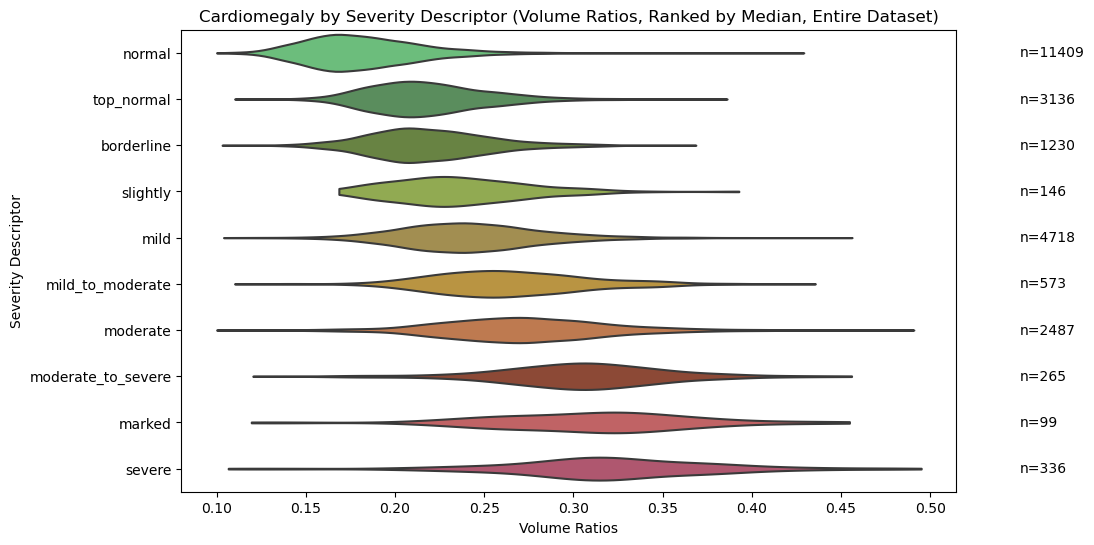

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to have seaborn installed
import numpy as np

# Assuming volume_ratio_dict is already populated with the required data

# Extract subfolders and corresponding volume ratios
subfolders = list(volume_ratio_dict.keys())
ratios_lists = list(volume_ratio_dict.values())

# Filter out lists with less than 50 elements
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 30]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 30]

# Calculate medians for each subfolder
medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]

# Sort subfolders based on medians in descending order
sorted_data = sorted(zip(medians, filtered_subfolders), reverse=False)
sorted_subfolders = [subfolder for _, subfolder in sorted_data]
sorted_ratios_lists = [volume_ratio_dict[subfolder] for subfolder in sorted_subfolders]

# Define custom colors
custom_colors = ['#bd4968', '#d05356', '#9a4128', '#d0753e', '#cd9c2e', '#af9544', '#97b943', '#6a8e38', '#519556', '#5fca74'][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title('Cardiomegaly by Severity Descriptor (Volume Ratios, Ranked by Median, Entire Dataset)')
ax.set_xlabel('Volume Ratios')
ax.set_ylabel('Severity Descriptor')
ax.set_yticklabels(sorted_subfolders)
ax.grid(False)

# Annotate the number of ratios for each violin
for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(0.55, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


In [22]:
import cv2
import os
import numpy as np

def process_all_subfolders(root_folder):
    # Dictionary to store for each primary subfolder
    diameter_dict = {}
    
    processed_images_count = 0

    # Loop through each primary subfolder in the root folder
    for primary_subfolder in os.listdir(root_folder):
        primary_subfolder_path = os.path.join(root_folder, primary_subfolder)

        # Check if the path is a directory
        if os.path.isdir(primary_subfolder_path):
            # Initialize for the current primary subfolder
            diameter_list = []

            # Loop through each sub-subfolder within the primary subfolder
            for sub_subfolder in os.listdir(primary_subfolder_path):
                sub_subfolder_path = os.path.join(primary_subfolder_path, sub_subfolder)

                # Check if the path is a directory
                if os.path.isdir(sub_subfolder_path):
                    heart_path = os.path.join(sub_subfolder_path, 'heart.png')
                    lung_path = os.path.join(sub_subfolder_path, 'lung.png')

                    # Open images using OpenCV
                    heart_img = cv2.imread(heart_path, cv2.IMREAD_GRAYSCALE)
                    lung_img = cv2.imread(lung_path, cv2.IMREAD_GRAYSCALE)

                    # Identify the biggest block of white pixels in the heart image
                    try:
                        contours, _ = cv2.findContours((heart_img == 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        biggest_heart_block = max(map(len, contours), default=0)
                    except ValueError:
                        print(f"Skipping {sub_subfolder} due to an issue with heart image contour identification.")
                        continue

                    # Record the amount of pixels in each row for the heart image
                    heart_pixel_counts = np.sum((heart_img == 255), axis=1)

                    # Record the amount of white pixels in each non-black row for the lung image
                    lung_pixel_counts = []

                    # Iterate over each row in the lung image
                    for row_idx in range(lung_img.shape[0]):
                        row_pixels = (lung_img[row_idx, :] == 255).astype(np.uint8)

                        # Check if the row contains white pixels
                        if np.any(row_pixels):
                            lung_pixel_counts.append(np.sum(row_pixels))

                    # Check if either heart_pixel_counts or lung_pixel_counts is empty
                    if not np.any(heart_pixel_counts) or not np.any(lung_pixel_counts):
                        print(f"Skipping {sub_subfolder} due to empty heart or lung pixel counts.")
                        continue

                    # Find the 95th percentile value for heart_pixel_counts and lung_pixel_counts, and store in the output list
                    heart_percentile = np.percentile(heart_pixel_counts, 95)
                    lung_percentile = np.percentile(lung_pixel_counts, 95)

                    # Append the percentiles to the sizes_list
                    diameter_list.append([heart_percentile, lung_percentile])
                    
                    # Increment the processed images count
                    processed_images_count += 1

                    # Print update every update_interval images processed
                    if processed_images_count % 100 == 0:
                        print(f"Processed {processed_images_count} images in {primary_subfolder}")

            # Store sizes_list in the dictionary with the primary subfolder name as the key
            diameter_dict[primary_subfolder] = diameter_list
            print(f"Processed {primary_subfolder}.")

    return diameter_dict


root_folder = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all"
diameter_dict = process_all_subfolders(root_folder)

# Print or use sizes_dict as needed
for subfolder, diameter_list in diameter_dict.items():
    print(f"{subfolder}: {diameter_list[0:5]}")


Processed 100 images in borderline
Processed 200 images in borderline
Processed 300 images in borderline
Processed 400 images in borderline
Processed 500 images in borderline
Processed 600 images in borderline
Processed 700 images in borderline
Processed 800 images in borderline
Skipping a3e591c8-73e007eb-7396fe2a-402195f1-570b2686 due to empty heart or lung pixel counts.
Processed 900 images in borderline
Processed 1000 images in borderline
Processed 1100 images in borderline
Processed 1200 images in borderline
Processed borderline.
Processed 1300 images in marked
Processed marked.
Processed massive.
Processed 1400 images in mild
Processed 1500 images in mild
Processed 1600 images in mild
Processed 1700 images in mild
Processed 1800 images in mild
Processed 1900 images in mild
Processed 2000 images in mild
Processed 2100 images in mild
Processed 2200 images in mild
Processed 2300 images in mild
Processed 2400 images in mild
Processed 2500 images in mild
Processed 2600 images in mild
P

Processed 19700 images in normal
Processed 19800 images in normal
Processed 19900 images in normal
Processed 20000 images in normal
Processed 20100 images in normal
Processed 20200 images in normal
Processed 20300 images in normal
Processed 20400 images in normal
Processed 20500 images in normal
Processed 20600 images in normal
Processed 20700 images in normal
Processed 20800 images in normal
Processed 20900 images in normal
Processed normal.
Processed possible.
Processed 21000 images in severe
Processed 21100 images in severe
Processed 21200 images in severe
Processed severe.
Processed 21300 images in significant
Processed significant.
Processed 21400 images in slightly
Processed slightly.
Processed somewhat.
Processed substantial.
Processed 21500 images in top_normal
Processed 21600 images in top_normal
Processed 21700 images in top_normal
Processed 21800 images in top_normal
Processed 21900 images in top_normal
Processed 22000 images in top_normal
Skipping 2da5004a-1ff7be2c-27ab41ce

In [23]:
import json

# Specify the desired output JSON file path
output_json_file_path = routput_json_file_path = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\diameter.json"

# Save sizes_dict to the specified JSON file path
with open(output_json_file_path, 'w') as json_file:
    json.dump(diameter_dict, json_file)

print(f"Sizes_dict has been saved to {output_json_file_path}")


Sizes_dict has been saved to D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\diameter.json


In [ ]:
# Regenerate diameter_ratio_dict

In [1]:
import numpy as np
import json

# Load diameter_dict from a JSON file
with open(r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\diameter.json", 'r') as json_file:
    diameter_dict = json.load(json_file)

# Initialize an empty dictionary for diameter ratios
diameter_ratio_dict = {}

# Iterate through each entry in diameter_dict
for primary_subfolder, diameter_list in diameter_dict.items():
    # Exclude pairs with either heart size or lung size equal to 0
    filtered_diameters = [(heart_diameter, lung_diameter) for heart_diameter, lung_diameter in diameter_list if heart_diameter != 0 and lung_diameter != 0]

    # Calculate diameter ratios for each pair of heart and lung diameters
    diameter_ratios = []
    for heart_diameter, lung_diameter in filtered_diameters:
        try:
            ratio = heart_diameter / lung_diameter

            # Exclude ratios bigger than 1
            if ratio <= 1.0:
                diameter_ratios.append(ratio)
        except Exception as e:
            # Handle any other exceptions
            print(f"Error processing pair in {primary_subfolder}: {e}")

    # Remove top and bottom 2.5 percentile of values
    lower_bound = np.percentile(diameter_ratios, 2.5)
    upper_bound = np.percentile(diameter_ratios, 97.5)
    filtered_ratios = [ratio for ratio in diameter_ratios if lower_bound <= ratio <= upper_bound]

    # Update the entry in diameter_ratio_dict
    diameter_ratio_dict[primary_subfolder] = filtered_ratios

# Print or use diameter_ratio_dict as needed
for subfolder, ratios_list in diameter_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")


borderline: [0.4823685961410512, 0.570268074735987, 0.5779722079258878, 0.5423728813559322, 0.5840957072484166]
marked: [0.558412520961431, 0.7170706006322445, 0.7993690851735016, 0.6110197368421053, 0.6343167701863354]
massive: [0.8237221494102228, 0.8594563331405437, 0.7425837320574162]
mild: [0.543509965969859, 0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
mild_to_moderate: [0.5845588235294118, 0.5793103448275863, 0.7224168126094571, 0.6122994652406417, 0.6861063464837049]
moderate: [0.6335920177383592, 0.6042356055592323, 0.5815722738799662, 0.5842763549731983, 0.6165244723843736]
moderate_to_severe: [0.7223154362416108, 0.7165644171779141, 0.7141927083333334, 0.5479693937610359, 0.6378122308354867]
normal: [0.49557522123893805, 0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
possible: [0.5451688923802043, 0.537320810677212, 0.5941023417172593]
severe: [0.7159636946075815, 0.7102869139258222, 0.706645056726094, 0.782

In [ ]:
# Add no_mentions

In [2]:
# JSON file containing the dictionary to append
json_file = r"D:\no_cardiomegaly_mentions.json"

# Read the JSON file and load its contents into a dictionary
with open(json_file, 'r') as file:
    data_dict = json.load(file)

# Append the contents of data_dict to existing_dict
diameter_ratio_dict.update(data_dict)

for subfolder, ratios_list in diameter_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")

borderline: [0.4823685961410512, 0.570268074735987, 0.5779722079258878, 0.5423728813559322, 0.5840957072484166]
marked: [0.558412520961431, 0.7170706006322445, 0.7993690851735016, 0.6110197368421053, 0.6343167701863354]
massive: [0.8237221494102228, 0.8594563331405437, 0.7425837320574162]
mild: [0.543509965969859, 0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
mild_to_moderate: [0.5845588235294118, 0.5793103448275863, 0.7224168126094571, 0.6122994652406417, 0.6861063464837049]
moderate: [0.6335920177383592, 0.6042356055592323, 0.5815722738799662, 0.5842763549731983, 0.6165244723843736]
moderate_to_severe: [0.7223154362416108, 0.7165644171779141, 0.7141927083333334, 0.5479693937610359, 0.6378122308354867]
normal: [0.49557522123893805, 0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
possible: [0.5451688923802043, 0.537320810677212, 0.5941023417172593]
severe: [0.7159636946075815, 0.7102869139258222, 0.706645056726094, 0.782

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (11).

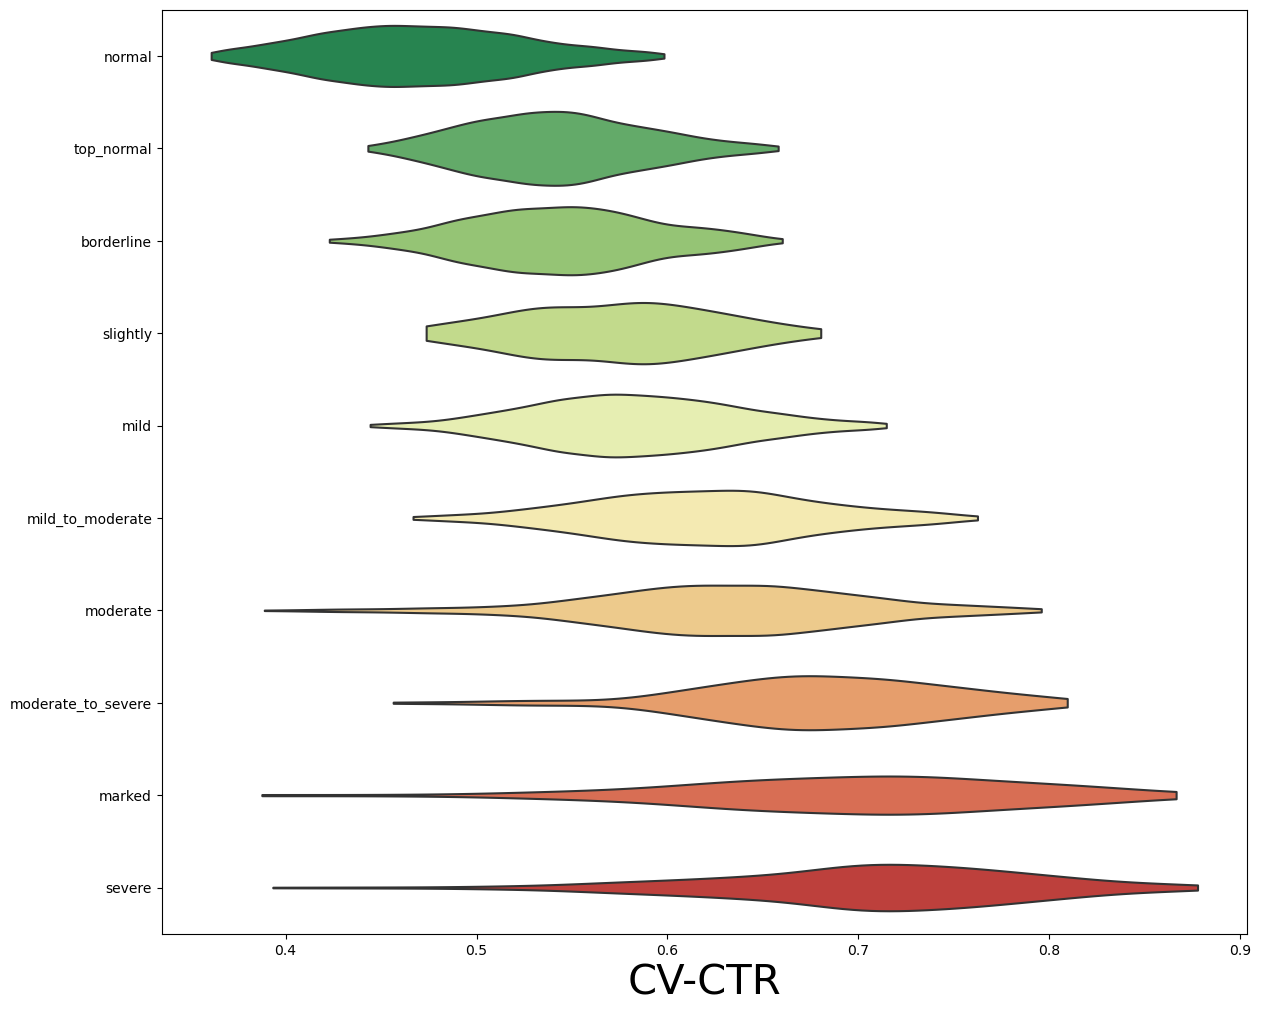

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to have seaborn installed
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Calculate medians for each subfolder
medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]

# Sort subfolders based on medians in descending order
sorted_subfolders = [subfolder for _, subfolder in sorted(zip(medians, filtered_subfolders), reverse=False)]

# Sort ratios_lists based on the sorted subfolders
sorted_ratios_lists = [diameter_ratio_dict[subfolder] for subfolder in sorted_subfolders]

# Create a colormap from green to red
cmap = sns.color_palette("RdYlGn_r", n_colors=len(sorted_subfolders))

# Create a horizontal violin plot with a gradient of colors
fig, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
#ax.set_title(r'CTR Distribution of Cardiomegaly Severity Descriptors', fontsize=30)
ax.set_xlabel(r'CV-CTR',fontsize=30)
ax.set_yticklabels(sorted_subfolders)
ax.set_yticklabels(["Normal", "No Mentions", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"], fontsize=25)
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.tick_params(axis='x', labelsize=25) 
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(1.02, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=20)
    
# Annotate the percentage of values > 0.5 for each violin
for i, ratios_list in enumerate(sorted_ratios_lists):
    above_half = np.mean(np.array(ratios_list) > 0.5)
    ax.text(0.99, i, f'({above_half*100:.1f}%)', va='center', ha='right', fontsize=20)
    

plt.savefig(r'C:\Users\Tianh\Downloads\CTR distribution.svg', format='svg', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [40]:
import json
import numpy as np

# Load data from the JSON file
with open(r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\volume.json", 'r') as json_file:
    sizes_dict = json.load(json_file)

# Initialize an empty dictionary for volume ratios
volume_ratio_dict = {}

# Iterate through each entry in sizes_dict
for primary_subfolder, sizes_list in sizes_dict.items():
    # Exclude pairs with either heart size or lung size equal to 0
    filtered_sizes = [(heart_size, lung_size) for heart_size, lung_size in sizes_list if heart_size != 0 and lung_size != 0]

    # Calculate volume ratios for each pair of heart and lung sizes
    volume_ratios = []
    for heart_size, lung_size in filtered_sizes:
        try:
            ratio = heart_size / lung_size
            volume_ratios.append(ratio)
        except Exception as e:
            # Handle any other exceptions
            print(f"Error processing pair in {primary_subfolder}: {e}")

    # Remove top and bottom 2.5 percentile of values for each individual key-value pair
    if volume_ratios:
        lower_bound = np.percentile(volume_ratios, 2.5)
        upper_bound = np.percentile(volume_ratios, 97.5)
        filtered_ratios = [ratio for ratio in volume_ratios if lower_bound <= ratio <= upper_bound]
        volume_ratio_dict[primary_subfolder] = filtered_ratios

# Print or use volume_ratio_dict as needed
for subfolder, ratios_list in volume_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")


borderline: [0.174847036986113, 0.25479246422266855, 0.19855372892043596, 0.2083240037847872, 0.2111130009665078]
marked: [0.21704453533428913, 0.3201823129771813, 0.3246030460595026, 0.26862325222413896, 0.24269686549983766]
massive: [0.3525157969650828, 0.3926664351282474, 0.3410729587299767]
mild: [0.26154417957531423, 0.2803578354688545, 0.24845665945456935, 0.31019239888896416, 0.2742737805164122]
mild_to_moderate: [0.22682141482461474, 0.20841410101927366, 0.3097005594137492, 0.23339384391468807, 0.33568661133219063]
moderate: [0.27223161113009675, 0.23417938033217123, 0.23579414821844216, 0.25203934470798384, 0.2499500883879491]
moderate_to_severe: [0.3242578876435557, 0.3426555783058874, 0.30078378353964236, 0.19214412915911774, 0.30292357869778114]
normal: [0.14713724203795744, 0.1605427749252658, 0.18143639977076725, 0.17259550739539667, 0.20133114786954717]
possible: [0.22281695915561567, 0.216773733047823, 0.22411026005123513]
severe: [0.2807134961086392, 0.3016179507473413

In [54]:
# Initialize an empty list to store combined ratios for selected severity descriptors
combined_ratios = []

# Iterate through each entry in volume_ratio_dict
for subfolder, ratios_list in volume_ratio_dict.items():
    # Check if the subfolder corresponds to one of the selected severity descriptors
    if subfolder in ["mild", "mild_to_moderate", "moderate", "moderate_to_severe", "marked", "severe"]:
        # Extend the combined_ratios list with the ratios from the current subfolder
        combined_ratios.extend(ratios_list)

# Calculate the 1st percentile lowest value
first_percentile = np.percentile(combined_ratios, 5)
print(f"The 1st percentile lowest value of the combined ratios is: {first_percentile}")


The 1st percentile lowest value of the combined ratios is: 0.1916629414755234


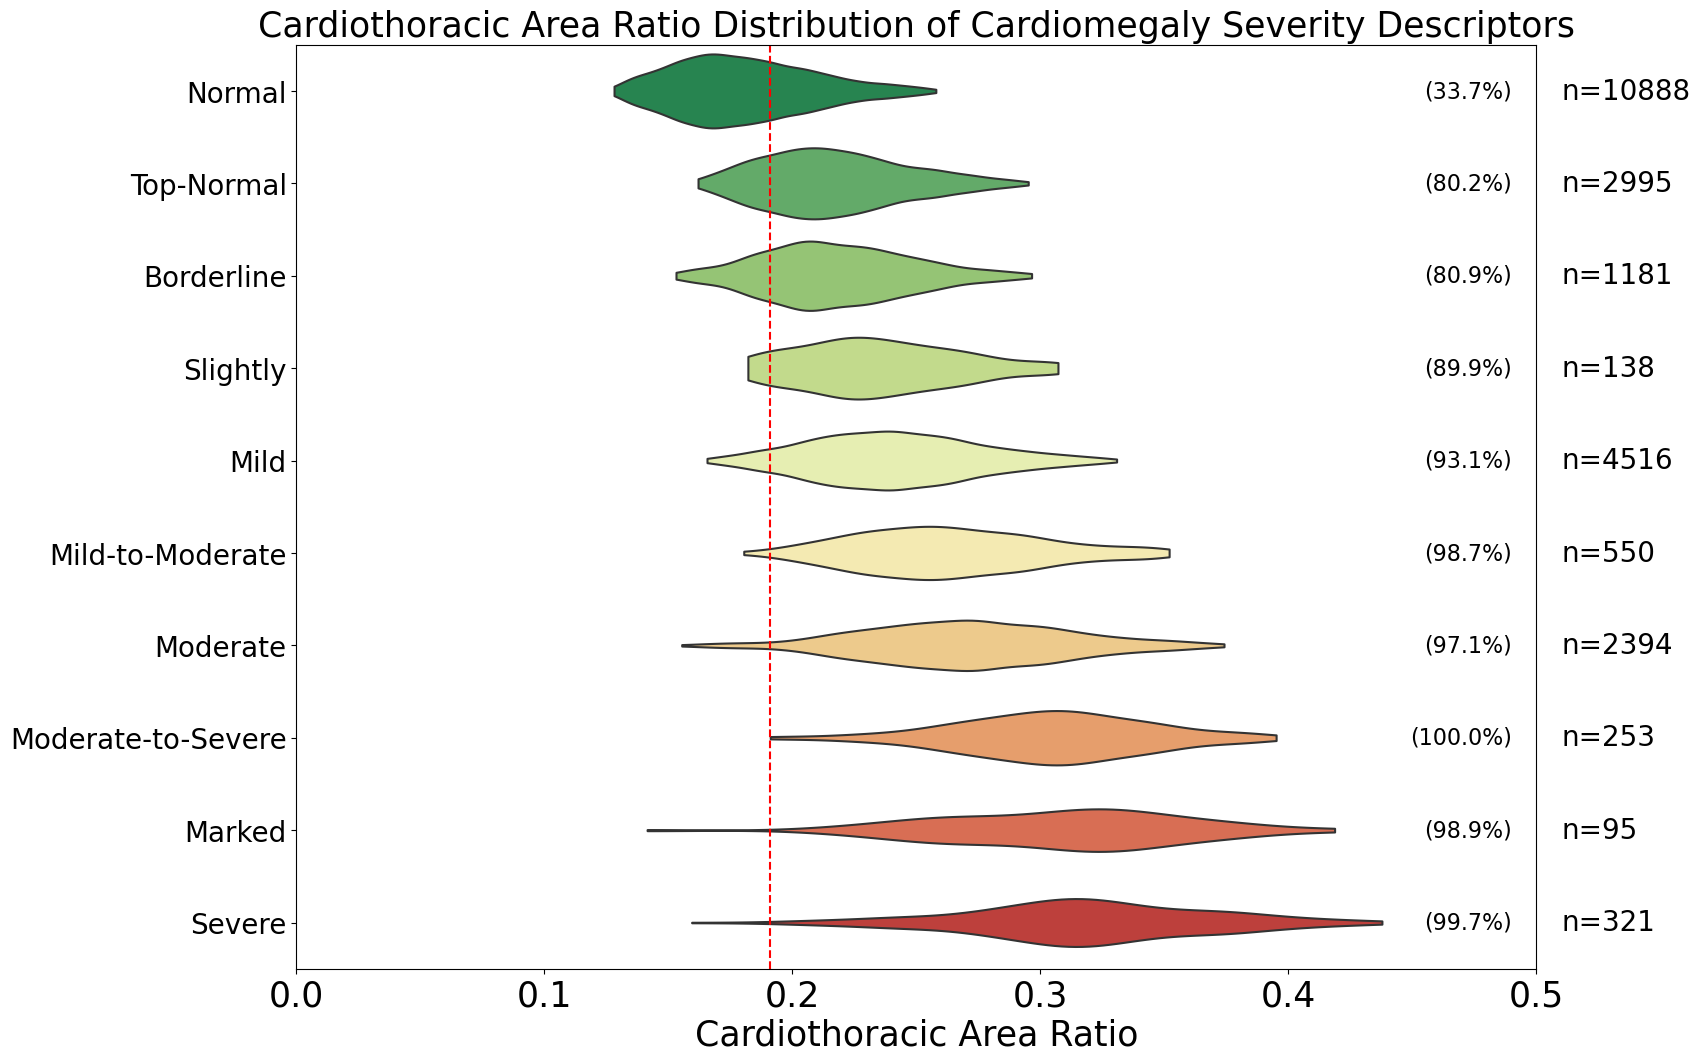

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to have seaborn installed
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(volume_ratio_dict.keys())
ratios_lists = list(volume_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Calculate medians for each subfolder
medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]

# Sort subfolders based on medians in descending order
sorted_subfolders = [subfolder for _, subfolder in sorted(zip(medians, filtered_subfolders), reverse=False)]

# Sort ratios_lists based on the sorted subfolders
sorted_ratios_lists = [volume_ratio_dict[subfolder] for subfolder in sorted_subfolders]

# Create a colormap from green to red
cmap = sns.color_palette("RdYlGn_r", n_colors=len(sorted_subfolders))

# Create a horizontal violin plot with a gradient of colors
fig, ax = plt.subplots(figsize=(16, 12))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title(r'Cardiothoracic Area Ratio Distribution of Cardiomegaly Severity Descriptors', fontsize=25)
ax.set_xlabel(r'Cardiothoracic Area Ratio',fontsize=25)
ax.set_yticklabels(sorted_subfolders)
ax.set_yticklabels(["Normal", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"], fontsize=20)
ax.grid(False)
ax.axvline(x=0.191, color='red', linestyle='--')

# Set x-axis range from 0 to 0.5
ax.tick_params(axis='x', labelsize=25) 
ax.set_xlim(0, 0.5)

# Annotate the number of ratios for each violin
for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(0.51, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=20)
    
# Annotate the percentage of values > 0.5 for each violin
for i, ratios_list in enumerate(sorted_ratios_lists):
    above_half = np.mean(np.array(ratios_list) > 0.191)
    ax.text(0.49, i, f'({above_half*100:.1f}%)', va='center', ha='right', fontsize=16)
    
    
# Show the plot
plt.show()


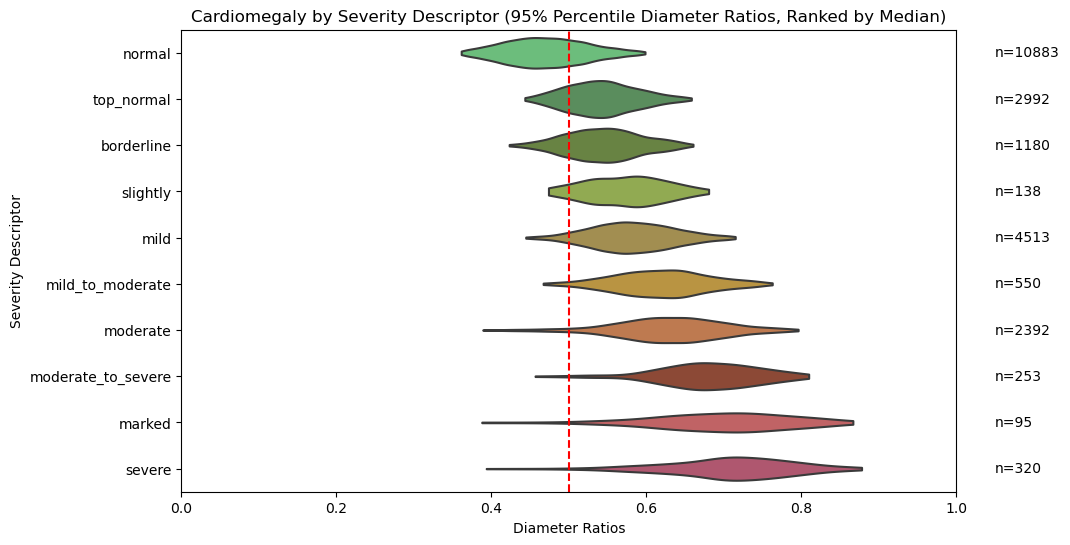

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Calculate medians for each subfolder
medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]

# Sort subfolders based on medians in descending order
sorted_subfolders = [subfolder for _, subfolder in sorted(zip(medians, filtered_subfolders), reverse=False)]

# Sort ratios_lists based on the sorted subfolders
sorted_ratios_lists = [diameter_ratio_dict[subfolder] for subfolder in sorted_subfolders]

# Define custom colors
custom_colors = ['#bd4968', '#d05356', '#9a4128', '#d0753e', '#cd9c2e', '#af9544', '#97b943', '#6a8e38', '#519556', '#5fca74'][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title('Cardiomegaly by Severity Descriptor (95% Percentile Diameter Ratios, Ranked by Median)')
ax.set_xlabel('Diameter Ratios')
ax.set_ylabel('Severity Descriptor')
ax.set_yticklabels(sorted_subfolders)
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


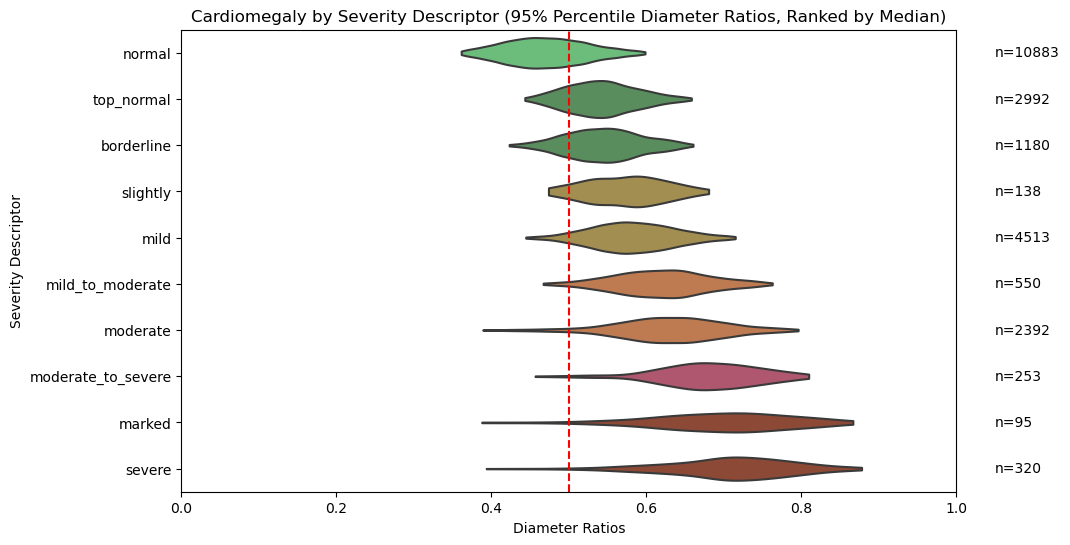

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Calculate medians for each subfolder
medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]

# Sort subfolders based on medians in descending order
sorted_subfolders = [subfolder for _, subfolder in sorted(zip(medians, filtered_subfolders), reverse=False)]

# Sort ratios_lists based on the sorted subfolders
sorted_ratios_lists = [diameter_ratio_dict[subfolder] for subfolder in sorted_subfolders]

# Define custom colors
custom_colors = ['#9a4128', '#9a4128', '#bd4968', '#d0753e', '#d0753e', '#af9544', '#af9544', '#519556', '#519556', '#5fca74'][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title('Cardiomegaly by Severity Descriptor (95% Percentile Diameter Ratios, Ranked by Median)')
ax.set_xlabel('Diameter Ratios')
ax.set_ylabel('Severity Descriptor')
ax.set_yticklabels(sorted_subfolders)
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


In [51]:

# Step 1: Sort ratio lists by median and create filtered_diameter_ratio_dict
filtered_diameter_ratio_dict = {subfolder: diameter_ratio_dict[subfolder] for subfolder in sorted(diameter_ratio_dict.keys(), key=lambda x: np.median(diameter_ratio_dict[x])) if len(diameter_ratio_dict[subfolder]) >= 50}

for subfolder, ratios in filtered_diameter_ratio_dict.items():
    print(f"{subfolder}: Length = {len(ratios)}")

# Step 2: Perform Sidak multiple t-test
p_values = []

sorted_subfolders = list(filtered_diameter_ratio_dict.keys())  # Creating a list of sorted subfolders

for i in range(len(sorted_subfolders) - 1):
    subfolder1 = sorted_subfolders[i]
    subfolder2 = sorted_subfolders[i + 1]

    ratios1 = filtered_diameter_ratio_dict[subfolder1]
    ratios2 = filtered_diameter_ratio_dict[subfolder2]

    # Perform t-test
    t_statistic, p_value = ttest_ind(ratios1, ratios2)

    # Store p-value
    p_values.append(p_value)

# Step 3: Print all p-values
print("P-values for all neighboring subfolder pairs:")
for pair, p_value in zip(zip(sorted_subfolders, sorted_subfolders[1:]), p_values):
    print(f"{pair[0]} vs {pair[1]}: p-value = {p_value}")


normal: Length = 11401
top_normal: Length = 3136
borderline: Length = 1231
slightly: Length = 146
mild: Length = 4711
mild_to_moderate: Length = 573
moderate: Length = 2482
moderate_to_severe: Length = 264
marked: Length = 98
severe: Length = 335
P-values for all neighboring subfolder pairs (Sidak corrected alpha=0.005683044988048058):
normal vs top_normal: p-value = 0.0 (Significant)
top_normal vs borderline: p-value = 0.20549584470049706 (Not Significant)
borderline vs slightly: p-value = 4.0786364356283136e-08 (Significant)
slightly vs mild: p-value = 0.059243759833600015 (Not Significant)
mild vs mild_to_moderate: p-value = 1.4136419743942445e-38 (Significant)
mild_to_moderate vs moderate: p-value = 0.001351807993723687 (Significant)
moderate vs moderate_to_severe: p-value = 2.238525201192648e-19 (Significant)
moderate_to_severe vs marked: p-value = 0.014446197462247594 (Not Significant)
marked vs severe: p-value = 0.7659170486123171 (Not Significant)


In [63]:
from scipy.stats import ttest_ind

# Step 1: Sort ratio lists by median and create filtered_diameter_ratio_dict
filtered_diameter_ratio_dict = {subfolder: diameter_ratio_dict[subfolder] for subfolder in sorted(diameter_ratio_dict.keys(), key=lambda x: np.median(diameter_ratio_dict[x])) if len(diameter_ratio_dict[subfolder]) >= 50}

for subfolder, ratios in filtered_diameter_ratio_dict.items():
    print(f"{subfolder}: Length = {len(ratios)}")

# Step 2: Perform Sidak multiple t-test
p_values = []

sorted_subfolders = list(filtered_diameter_ratio_dict.keys())  # Creating a list of sorted subfolders

alpha = 0.05  # Set your desired overall significance level here
m = len(sorted_subfolders) - 1  # Number of tests

alpha_sidak = 1 - (1 - alpha) ** (1 / m)  # Calculate corrected significance level

for i in range(m):
    subfolder1 = sorted_subfolders[i]
    subfolder2 = sorted_subfolders[i + 1]

    ratios1 = filtered_diameter_ratio_dict[subfolder1]
    ratios2 = filtered_diameter_ratio_dict[subfolder2]

    # Perform t-test
    t_statistic, p_value = ttest_ind(ratios1, ratios2)

    # Adjust p-value with Sidak correction
    p_value_corrected = 1 - (1 - p_value) ** m

    # Store corrected p-value
    p_values.append(p_value_corrected)

# Step 3: Print all p-values with Sidak correction
print(f"P-values for all neighboring subfolder pairs (Sidak corrected alpha={alpha_sidak}):")
for pair, p_value in zip(zip(sorted_subfolders, sorted_subfolders[1:]), p_values):
    print(f"{pair[0]} vs {pair[1]}: p-value = {p_value} ({'Significant' if p_value < alpha_sidak else 'Not Significant'})")

    
    
# Manually add "moderate" vs "severe" t-test without Sidak correction
ratios_moderate = filtered_diameter_ratio_dict.get("moderate_to_severe", [])
ratios_severe = filtered_diameter_ratio_dict.get("severe", [])

t_statistic_manual, p_value_manual = ttest_ind(ratios_moderate, ratios_severe)

# Print manually calculated p-value without Sidak correction
print(f"Manually added test between moderate_to_severe and severe: p-value = {p_value_manual} ({'Significant' if p_value_manual < alpha else 'Not Significant'})")

normal: Length = 11401
top_normal: Length = 3136
borderline: Length = 1231
slightly: Length = 146
mild: Length = 4711
mild_to_moderate: Length = 573
moderate: Length = 2482
moderate_to_severe: Length = 264
marked: Length = 98
severe: Length = 335
P-values for all neighboring subfolder pairs (Sidak corrected alpha=0.005683044988048058):
normal vs top_normal: p-value = 0.0 (Significant)
top_normal vs borderline: p-value = 0.8738563026176834 (Not Significant)
borderline vs slightly: p-value = 3.6707721973172625e-07 (Significant)
slightly vs mild: p-value = 0.42284299694173766 (Not Significant)
mild vs mild_to_moderate: p-value = 0.0 (Significant)
mild_to_moderate vs moderate: p-value = 0.012100693171626875 (Not Significant)
moderate vs moderate_to_severe: p-value = 0.0 (Significant)
moderate_to_severe vs marked: p-value = 0.12275067813203433 (Not Significant)
marked vs severe: p-value = 0.9999978897784162 (Not Significant)
Manually added test between moderate_to_severe and severe: p-value

In [74]:
import pandas as pd
from scipy.stats import ttest_ind

# Step 1: Sort ratio lists by median and create filtered_diameter_ratio_dict
filtered_diameter_ratio_dict = {subfolder: diameter_ratio_dict[subfolder] for subfolder in sorted(diameter_ratio_dict.keys(), key=lambda x: np.median(diameter_ratio_dict[x])) if len(diameter_ratio_dict[subfolder]) >= 50}

for subfolder, ratios in filtered_diameter_ratio_dict.items():
    print(f"{subfolder}: Length = {len(ratios)}")

# Step 2: Perform Sidak multiple t-test
p_values = []

sorted_subfolders = list(filtered_diameter_ratio_dict.keys())  # Creating a list of sorted subfolders

alpha = 0.05  # Set your desired overall significance level here
m = len(sorted_subfolders) - 1  # Number of tests

alpha_sidak = 1 - (1 - alpha) ** (1 / m)  # Calculate corrected significance level

comparison_results = []

for i in range(m):
    subfolder1 = sorted_subfolders[i]
    subfolder2 = sorted_subfolders[i + 1]

    ratios1 = filtered_diameter_ratio_dict[subfolder1]
    ratios2 = filtered_diameter_ratio_dict[subfolder2]

    # Perform t-test
    t_statistic, p_value = ttest_ind(ratios1, ratios2)

    # Adjust p-value with Sidak correction
    p_value_corrected = 1 - (1 - p_value) ** m

    # Store corrected p-value
    p_values.append(p_value_corrected)

    # Store comparison results
    comparison_results.append({
        'Comparison': f"{subfolder1} vs {subfolder2}",
        'Adjusted P-Value': p_value_corrected,
        'Verdict': 'Significant' if p_value_corrected < alpha_sidak else 'Not Significant'
    })

# Save results to CSV
csv_path = r'D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\sidak_results.csv' 
df_results = pd.DataFrame(comparison_results)
df_results.to_csv(csv_path, index=False)

# Step 3: Print all p-values with Sidak correction
print(f"P-values for all neighboring subfolder pairs (Sidak corrected alpha={alpha_sidak}):")
for result in comparison_results:
    print(f"{result['Comparison']}: p-value = {result['Adjusted P-Value']} ({result['Verdict']})")

# Manually add "moderate" vs "severe" t-test without Sidak correction
ratios_moderate = filtered_diameter_ratio_dict.get("moderate_to_severe", [])
ratios_severe = filtered_diameter_ratio_dict.get("severe", [])

t_statistic_manual, p_value_manual = ttest_ind(ratios_moderate, ratios_severe)

# Print manually calculated p-value without Sidak correction
verdict_manual = 'Significant' if p_value_manual < alpha else 'Not Significant'
print(f"Manually added test between moderate_to_severe and severe: p-value = {p_value_manual} ({verdict_manual})")


normal: Length = 11401
top_normal: Length = 3136
borderline: Length = 1231
slightly: Length = 146
mild: Length = 4711
mild_to_moderate: Length = 573
moderate: Length = 2482
moderate_to_severe: Length = 264
marked: Length = 98
severe: Length = 335
P-values for all neighboring subfolder pairs (Sidak corrected alpha=0.005683044988048058):
normal vs top_normal: p-value = 0.0 (Significant)
top_normal vs borderline: p-value = 0.8738563026176834 (Not Significant)
borderline vs slightly: p-value = 3.6707721973172625e-07 (Significant)
slightly vs mild: p-value = 0.42284299694173766 (Not Significant)
mild vs mild_to_moderate: p-value = 0.0 (Significant)
mild_to_moderate vs moderate: p-value = 0.012100693171626875 (Not Significant)
moderate vs moderate_to_severe: p-value = 0.0 (Significant)
moderate_to_severe vs marked: p-value = 0.12275067813203433 (Not Significant)
marked vs severe: p-value = 0.9999978897784162 (Not Significant)
Manually added test between moderate_to_severe and severe: p-value

marked list: [0.558412520961431, 0.7170706006322445, 0.7993690851735016, 0.6110197368421053, 0.6343167701863354]
severe list: [0.7159636946075815, 0.7102869139258222, 0.706645056726094, 0.7828586360073168, 0.705531914893617]


C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


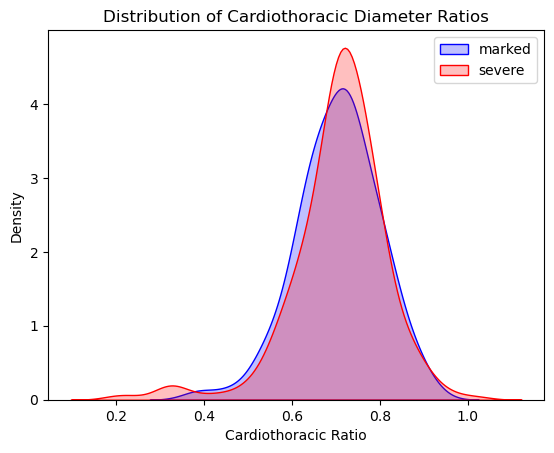

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming diameter_ratio_dict is already populated with the required data
# Specify the keywords
keyword1 = "marked"
keyword2 = "severe"

# Extract the lists based on the keywords
list1 = diameter_ratio_dict.get(keyword1, [])
list2 = diameter_ratio_dict.get(keyword2, [])

# Print the first 5 elements for debugging
print(f"{keyword1} list: {list1[:5]}")
print(f"{keyword2} list: {list2[:5]}")

# Create seaborn kernel density estimate (KDE) curves
sns.kdeplot(list1, color='blue', label=keyword1, fill=True)
sns.kdeplot(list2, color='red', label=keyword2, fill=True)

plt.title('Distribution of Cardiothoracic Diameter Ratios')
plt.xlabel('Cardiothoracic Ratio')
plt.ylabel('Density')

# Customize legend
plt.legend()

# Show the plot
plt.show()


In [72]:
from scipy.stats import kruskal

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Initialize a matrix for p-values
p_values_matrix = []

# Perform Kruskal-Wallis test between each pair of ratio lists
for i in range(len(ratios_lists)):
    row_p_values = []
    for j in range(len(ratios_lists)):
        if i == j:
            # Same list, insert a placeholder value (e.g., 1.0)
            row_p_values.append("-")
        else:
            # Perform Kruskal-Wallis test
            _, p_value = kruskal(ratios_lists[i], ratios_lists[j])
            row_p_values.append(f"{p_value:.5f}")

    # Append the row to the matrix
    p_values_matrix.append(row_p_values)

# Print the formatted matrix
header = "\t".join(subfolders)
print(f"\t{header}")
for i in range(len(subfolders)):
    print(f"{subfolders[i]}\t{', '.join(p_values_matrix[i])}")


	borderline	marked	massive	mild	mild_to_moderate	moderate	moderate_to_severe	normal	possible	severe	significant	slightly	somewhat	substantial	top_normal
borderline	-, 0.00000, 0.00015, 0.00000, 0.00000, 0.00000, 0.00000, 0.00000, 0.63978, 0.00000, 0.00000, 0.00000, 0.29561, 0.00000, 0.04648
marked	0.00000, -, 0.05509, 0.00000, 0.00000, 0.00000, 0.01595, 0.00000, 0.02223, 0.56070, 0.29054, 0.00000, 0.00031, 0.07493, 0.00000
massive	0.00015, 0.05509, -, 0.00036, 0.00136, 0.00258, 0.01877, 0.00012, 0.02828, 0.06987, 0.05882, 0.00031, 0.00448, 0.03120, 0.00016
mild	0.00000, 0.00000, 0.00036, -, 0.00000, 0.00000, 0.00000, 0.00000, 0.51852, 0.00000, 0.00016, 0.03879, 0.56964, 0.00003, 0.00000
mild_to_moderate	0.00000, 0.00000, 0.00136, 0.00000, -, 0.00511, 0.00000, 0.00000, 0.13910, 0.00000, 0.02749, 0.00000, 0.03816, 0.01452, 0.00000
moderate	0.00000, 0.00000, 0.00258, 0.00000, 0.00511, -, 0.00000, 0.00000, 0.13550, 0.00000, 0.08208, 0.00000, 0.02608, 0.07094, 0.00000
moderate_to_severe	0.0

In [74]:
import csv
from scipy.stats import kruskal

# Assuming diameter_ratio_dict is already populated with the required data

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Initialize a CSV file for writing
csv_file_path = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_segmented\ANOVA_results.csv"

# Perform Kruskal-Wallis test between each pair of ratio lists and write to CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write header row
    header_row = [""] + subfolders
    writer.writerow(header_row)

    # Write data rows
    for i in range(len(ratios_lists)):
        row_values = [subfolders[i]]
        for j in range(len(ratios_lists)):
            if i == j:
                # Same list, insert a placeholder value (e.g., "-")
                row_values.append("-")
            else:
                # Perform Kruskal-Wallis test
                _, p_value = kruskal(ratios_lists[i], ratios_lists[j])
                row_values.append(p_value)

        # Write the row to the CSV file
        writer.writerow(row_values)

print(f"Results saved to {csv_file_path}")


Results saved to D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_segmented\ANOVA_results.csv


In [75]:
import csv

# Read the CSV file
csv_file_path = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_segmented\ANOVA_results.csv"

with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Extract header and data
header = rows[0]
data = rows[1:]

# Define the significance level
significance_level = 0.001

# Find pairs that are NOT significantly different
not_significant_pairs = []

for i in range(1, len(header)):
    for j in range(i + 1, len(header)):
        p_value = float(data[i - 1][j])
        if p_value > significance_level:
            not_significant_pairs.append([header[i], header[j]])

# Print the result
print("Pairs of keywords that are NOT significantly different:")
for pair in not_significant_pairs:
    print(pair)


Pairs of keywords that are NOT significantly different:
['borderline', 'possible']
['borderline', 'somewhat']
['borderline', 'top_normal']
['marked', 'massive']
['marked', 'moderate_to_severe']
['marked', 'possible']
['marked', 'severe']
['marked', 'significant']
['marked', 'substantial']
['massive', 'mild_to_moderate']
['massive', 'moderate']
['massive', 'moderate_to_severe']
['massive', 'possible']
['massive', 'severe']
['massive', 'significant']
['massive', 'somewhat']
['massive', 'substantial']
['mild', 'possible']
['mild', 'slightly']
['mild', 'somewhat']
['mild_to_moderate', 'moderate']
['mild_to_moderate', 'possible']
['mild_to_moderate', 'significant']
['mild_to_moderate', 'somewhat']
['mild_to_moderate', 'substantial']
['moderate', 'possible']
['moderate', 'significant']
['moderate', 'somewhat']
['moderate', 'substantial']
['moderate_to_severe', 'possible']
['moderate_to_severe', 'significant']
['moderate_to_severe', 'substantial']
['normal', 'possible']
['normal', 'somewhat']

In [92]:
import csv

# Read the CSV file
csv_file_path = r"D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_segmented\ANOVA_results.csv"

with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Extract header and data
header = rows[0]
data = rows[1:]

# Define the significance level
significance_level = 0.05

# Find pairs that are NOT significantly different and have at least 50 ratios in both groups
not_significant_pairs = []

for i in range(1, len(header)):
    for j in range(i + 1, len(header)):
        p_value = float(data[i - 1][j])
        group_1 = header[i]
        group_2 = header[j]

        # Check if the pair is not significantly different and has at least 50 ratios in both groups
        if p_value > significance_level:
            group_1_ratios = diameter_ratio_dict[group_1]
            group_2_ratios = diameter_ratio_dict[group_2]

            if len(group_1_ratios) >= 50 and len(group_2_ratios) >= 50:
                not_significant_pairs.append([group_1, group_2])

# Print the result
print("Filtered Pairs of keywords that are NOT significantly different and have at least 50 ratios in both groups:")
for pair in not_significant_pairs:
    print(pair)


Filtered Pairs of keywords that are NOT significantly different and have at least 50 ratios in both groups:
['marked', 'severe']


C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tianh\anaconda3\envs\CXR\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

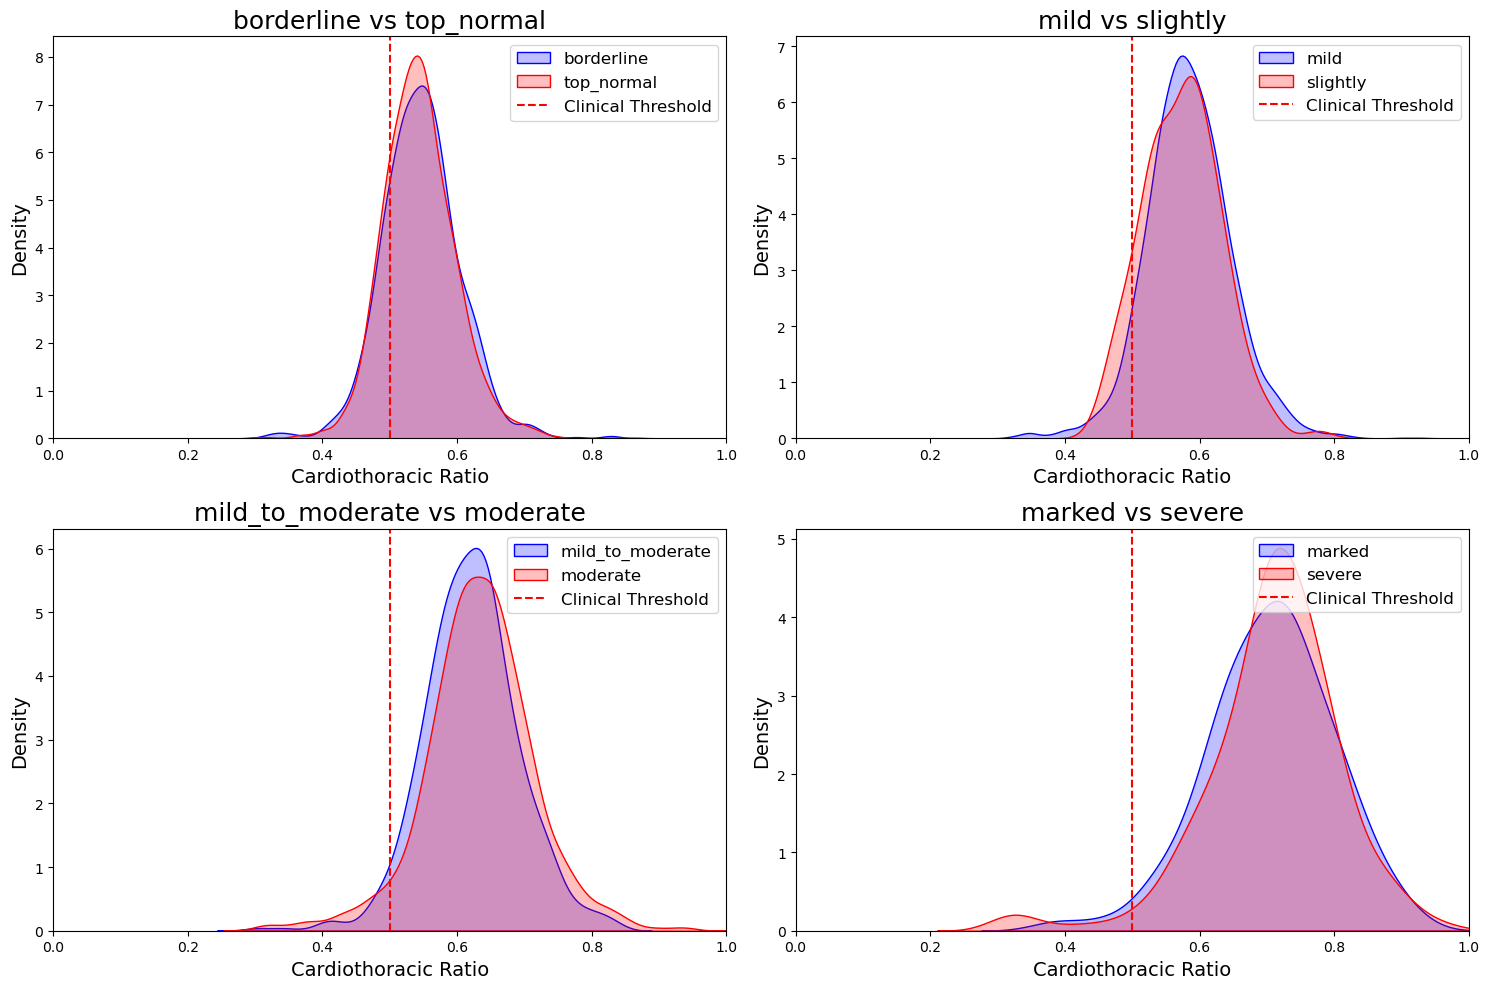

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def generate_plots(nested_keywords, diameter_ratio_dict):
    num_pairs = len(nested_keywords)
    cols = 2
    rows = 2

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

    for i, keywords_pair in enumerate(nested_keywords):
        keyword1, keyword2 = keywords_pair

        # Extract the lists based on the keywords
        list1 = diameter_ratio_dict.get(keyword1, [])
        list2 = diameter_ratio_dict.get(keyword2, [])

        # Create seaborn kernel density estimate (KDE) curves
        row = i // cols
        col = i % cols
        sns.kdeplot(list1, color='blue', label=keyword1, fill=True, ax=axes[row, col])
        sns.kdeplot(list2, color='red', label=keyword2, fill=True, ax=axes[row, col])

        # Set x-axis range from 0 to 1
        axes[row, col].set_xlim(0, 1)

        # Add a red dashed vertical line at x=0.5
        axes[row, col].axvline(x=0.5, color='red', linestyle='--', label='Clinical Threshold')

        axes[row, col].set_title(f'{keyword1} vs {keyword2}', fontsize=18)
        axes[row, col].set_xlabel('Cardiothoracic Ratio', fontsize=14)
        axes[row, col].set_ylabel('Density', fontsize=14)

        # Customize legend
        axes[row, col].legend(fontsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
nested_keywords = [['borderline', 'top_normal'],
['mild', 'slightly'],
['mild_to_moderate', 'moderate'],
['marked', 'severe'],
]
generate_plots(nested_keywords, diameter_ratio_dict)


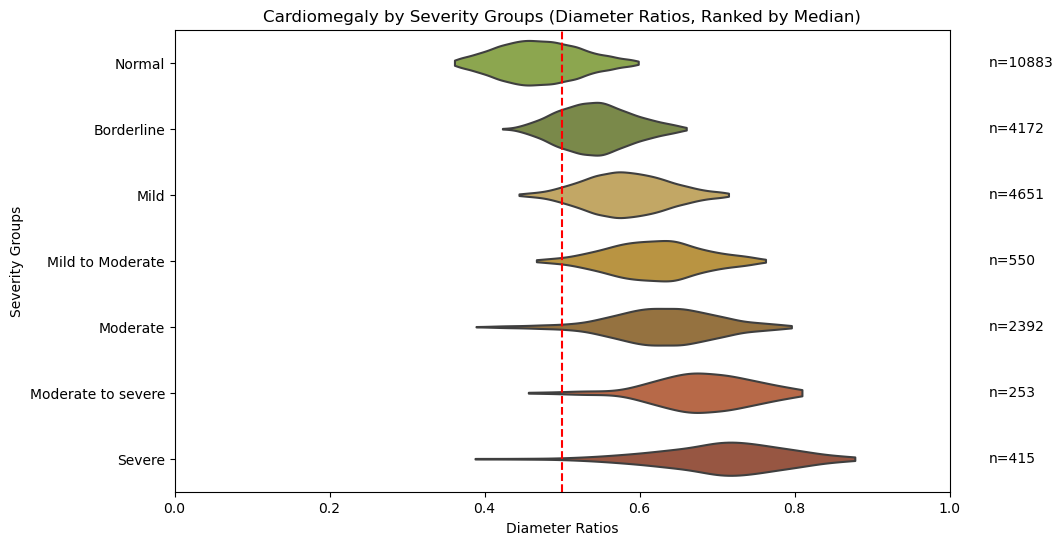

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]


# Define custom colors
custom_colors = ["#a54f34",
"#ca6235",
"#a37532",
"#cd9c2e",
"#d1ad56",
"#80933f",
"#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title('Cardiomegaly by Severity Groups (Diameter Ratios, Ranked by Median)')
ax.set_xlabel('Diameter Ratios')
ax.set_ylabel('Severity Groups')
ax.set_yticklabels(severity_groups.keys())
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


In [99]:
import numpy as np
from scipy.stats import ttest_ind

def calculate_thresholds(ratios_lists):
    thresholds = []
    num_sublists = len(ratios_lists)

    for i in range(num_sublists - 1):
        sublist1 = ratios_lists[i]
        sublist2 = ratios_lists[i + 1]

        # Perform t-test
        _, p_value = ttest_ind(sublist1, sublist2)

        # Choose a significance level (e.g., 0.05) and check if p-value is below it
        significance_level = 0.05
        if p_value < significance_level:
            # If p-value is below significance level, consider the threshold
            threshold = np.percentile(sublist2, 50)  # Use median of the next sublist as the threshold
            thresholds.append(threshold)

    return thresholds

thresholds = calculate_thresholds(sorted_grouped_ratios_lists)

In [100]:
print(thresholds)

[0.5415307755999754, 0.5807086614173228, 0.6188568291279316, 0.6314752575085953, 0.6802368615840119, 0.7126436781609196]


In [124]:
import numpy as np
from scipy.stats import ttest_ind

def calculate_thresholds(ratios_lists):
    thresholds = []
    previous_group = None

    # Iterate through values between 0.42 and 1 at intervals of 0.01
    for value in np.arange(0.42, 1.01, 0.01):
        max_p_value = 0
        max_p_group = None

        # Iterate through sublists and perform t-test for each value
        for i, sublist in enumerate(ratios_lists):
            _, p_value = ttest_ind(sublist, [value])

            # Update max_p_value and max_p_group
            if p_value > max_p_value:
                max_p_value = p_value
                max_p_group = i

        # Record threshold when the highest p value belongs to a different group
        if max_p_group != previous_group:
            # Round the threshold to 0.01
            rounded_threshold = round(value, 2)
            thresholds.append(rounded_threshold)
            previous_group = max_p_group

    return thresholds

# Apply the updated function to sorted_grouped_ratios_lists
new_thresholds = calculate_thresholds(sorted_grouped_ratios_lists)

# Display the new thresholds
print("New Thresholds:", new_thresholds)


New Thresholds: [0.42, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7]


C:\Users\Tianh\AppData\Local\Temp\ipykernel_21388\3417358096.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(severity_groups.keys())


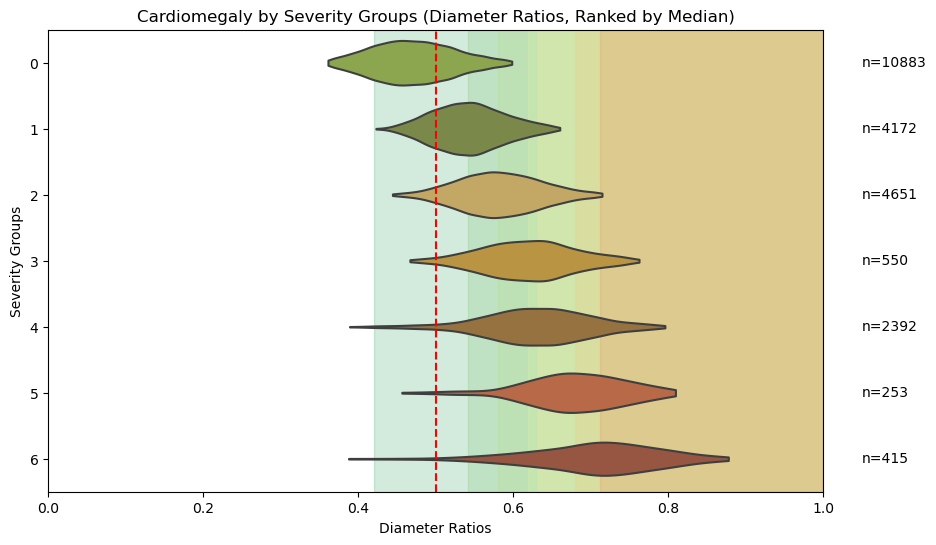

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors
custom_colors = ["#a54f34", "#ca6235", "#a37532", "#cd9c2e", "#d1ad56", "#80933f", "#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the plot
ax.set_title('Cardiomegaly by Severity Groups (Diameter Ratios, Ranked by Median)')
ax.set_xlabel('Diameter Ratios')
ax.set_ylabel('Severity Groups')
ax.set_yticklabels(severity_groups.keys())
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.set_xlim(0, 1)

# Shade the x-value intervals based on thresholds with "RdYlGn_r" color gradient
thresholds = [0.42, 0.5415, 0.5807, 0.6189, 0.6315, 0.6802, 0.7126]
colors = sns.color_palette("RdYlGn", n_colors=len(thresholds) + 1)[::-1]

for i, threshold in enumerate(thresholds):
    ax.axvspan(threshold, 1, color=colors[i], alpha=0.2)

# Create a violin plot on top of the shading
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


In [112]:
print(severity_groups.keys())

dict_keys(['Normal', 'Borderline', 'Mild', 'Mild to Moderate', 'Moderate', 'Moderate to severe', 'Severe'])


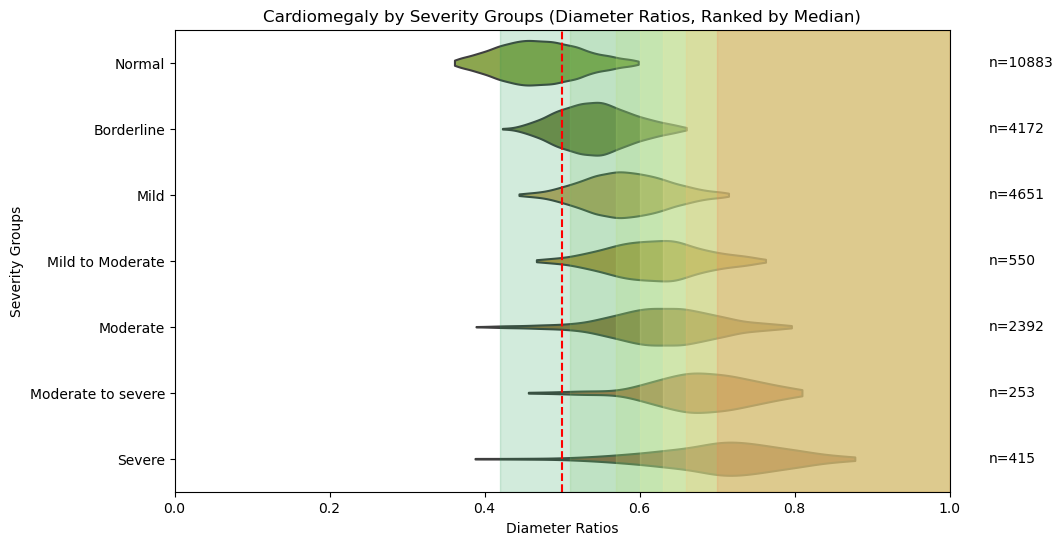

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming diameter_ratio_dict is already populated with the required data

# ... (Previous code remains unchanged)

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors
custom_colors = ["#a54f34", "#ca6235", "#a37532", "#cd9c2e", "#d1ad56", "#80933f", "#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Shade the x-value intervals based on thresholds with "RdYlGn_r" color gradient
thresholds = [0.42, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7]
colors = sns.color_palette("RdYlGn", n_colors=len(thresholds) + 1)[::-1]

for i, threshold in enumerate(thresholds):
    ax.axvspan(threshold, 1, color=colors[i], alpha=0.2)

# Customize the plot (remaining code remains unchanged)
ax.set_title('Cardiomegaly by Severity Groups (Diameter Ratios, Ranked by Median)')
ax.set_xlabel('Diameter Ratios')
ax.set_ylabel('Severity Groups')
ax.set_yticklabels(severity_groups.keys())
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Show the plot
plt.show()


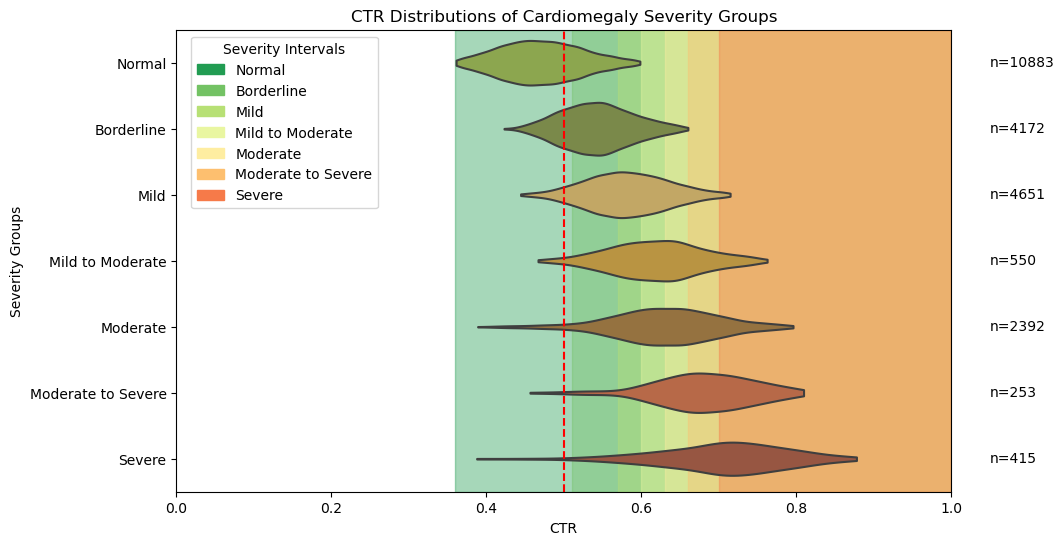

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to Severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors
custom_colors = ["#a54f34", "#ca6235", "#a37532", "#cd9c2e", "#d1ad56", "#80933f", "#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot (remaining code remains unchanged)
ax.set_title('CTR Distributions of Cardiomegaly Severity Groups')
ax.set_xlabel('CTR')
ax.set_ylabel('Severity Groups')
ax.set_yticklabels(severity_groups.keys())
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Shade the x-value intervals based on thresholds with "RdYlGn_r" color gradient
thresholds = [0.36, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7]
colors = sns.color_palette("RdYlGn", n_colors=len(thresholds) + 1)[::-1]


for i, threshold in enumerate(thresholds):
    ax.axvspan(threshold, 1, color=colors[i], alpha=0.4, zorder=-1)
    
# Add legend with color blocks and severity group names
legend_elements = [Patch(color=colors[i], label=group) for i, group in enumerate(severity_groups.keys())]

ax.legend(handles=legend_elements, title="Severity Intervals", bbox_to_anchor=(0.01, 1), loc='upper left')

# Show the plot
plt.show()


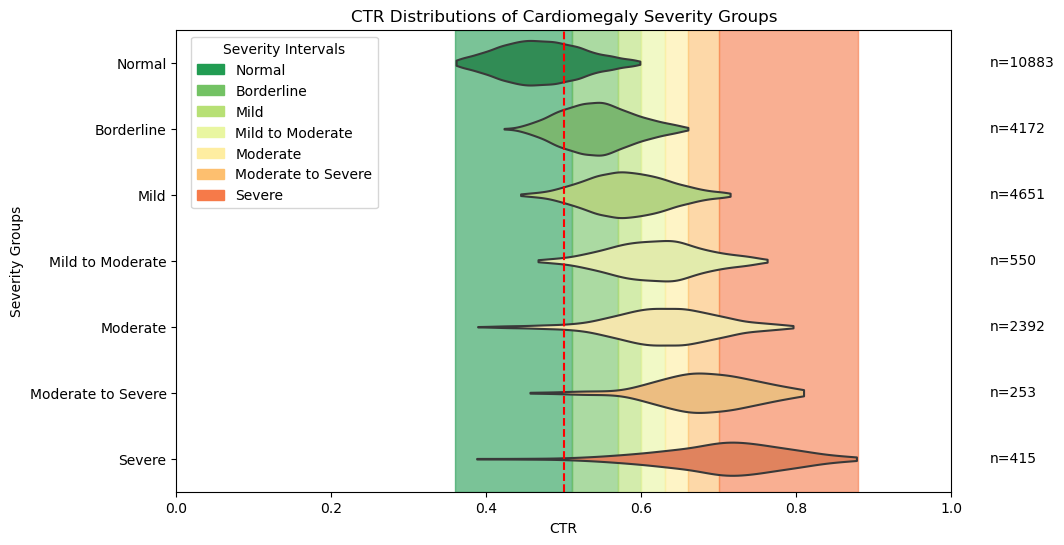

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to Severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors
custom_colors = ["#a54f34", "#ca6235", "#a37532", "#cd9c2e", "#d1ad56", "#80933f", "#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette("RdYlGn", n_colors=len(thresholds))[::-1]

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot (remaining code remains unchanged)
ax.set_title('CTR Distributions of Cardiomegaly Severity Groups')
ax.set_xlabel('CTR')
ax.set_ylabel('Severity Groups')
ax.set_yticklabels(severity_groups.keys())
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.05, i, f'n={len(ratios_list)}', va='center', ha='left')

# Shade the x-value intervals based on thresholds with "RdYlGn_r" color gradient
thresholds = [0.36, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7, 0.88]  # Updated thresholds
colors = sns.color_palette("RdYlGn", n_colors=len(thresholds))[::-1]

for i, threshold in enumerate(thresholds):
    if threshold < 0.88:
        ax.axvspan(threshold, thresholds[i+1], color=colors[i], alpha=0.6, zorder=-1)


# Add legend with color blocks and severity group names
legend_elements = [Patch(color=colors[i], label=group) for i, group in enumerate(severity_groups.keys())]

ax.legend(handles=legend_elements, title="Severity Intervals", bbox_to_anchor=(0.01, 1), loc='upper left')

# Show the plot
plt.show()


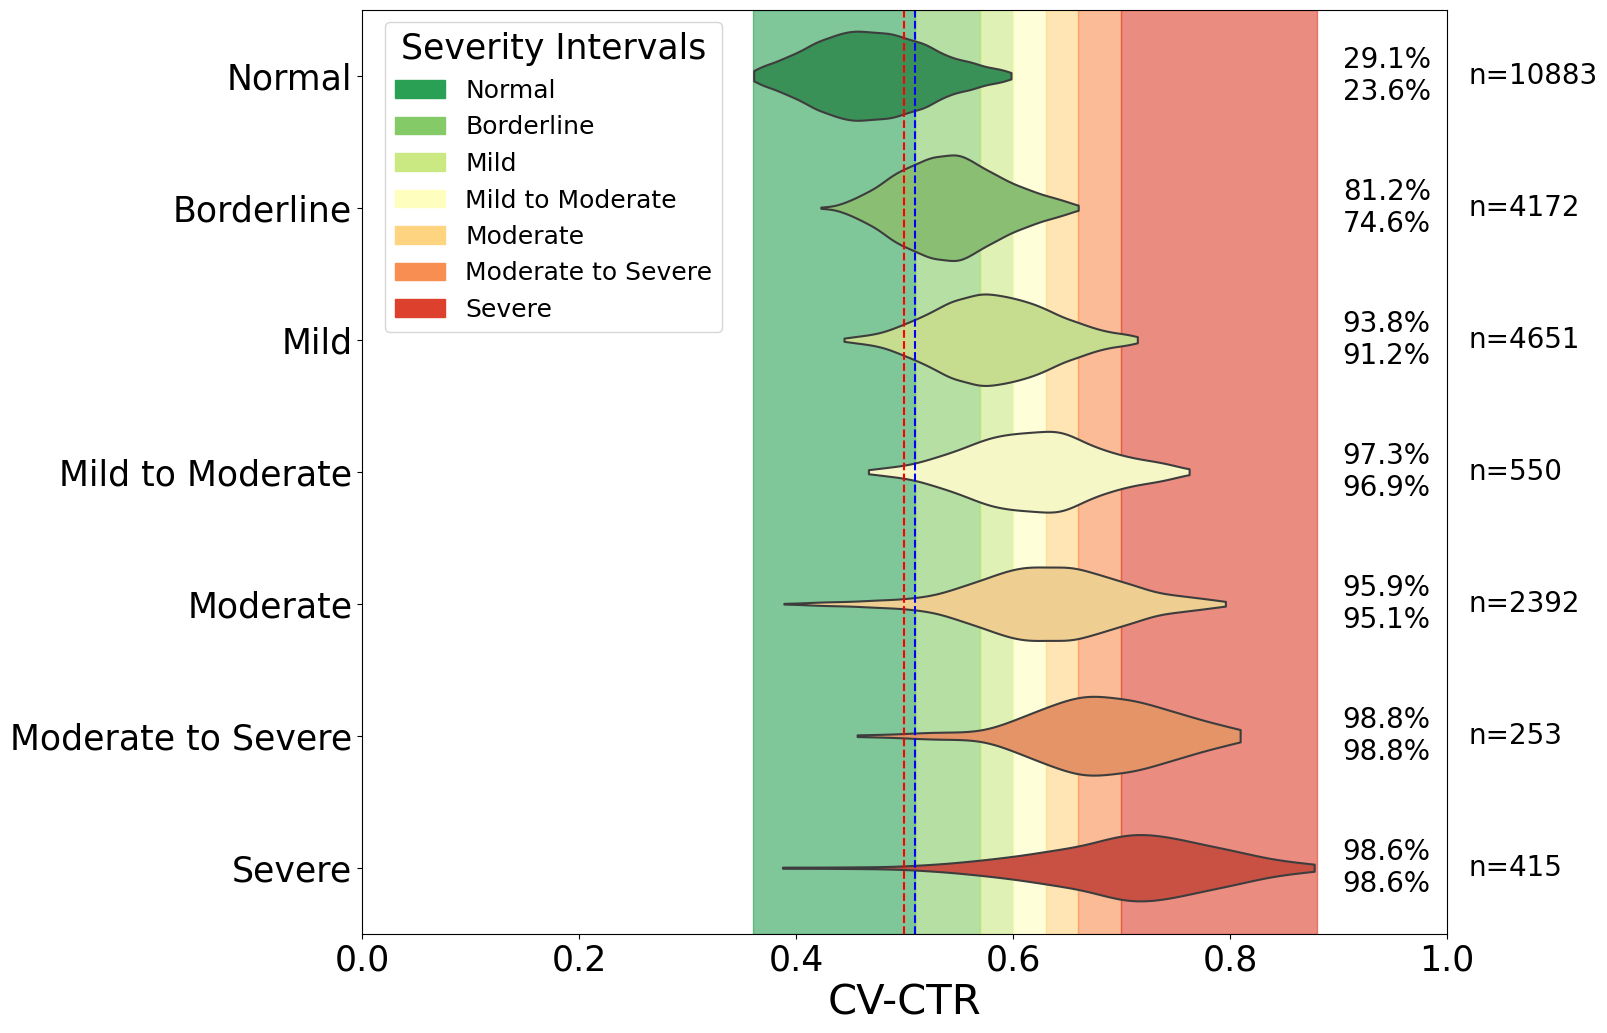

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to Severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors for the colormap transitioning from green to red
n_colors = len(sorted_grouped_subfolders)
custom_colors = sns.color_palette("RdYlGn", n_colors)

# Create a colormap transitioning from green to red
cmap = sns.color_palette(custom_colors[::-1])

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot (remaining code remains unchanged)
#ax.set_title('CTR Distributions of Cardiomegaly Severity Groups', fontsize=30)
ax.set_xlabel('CV-CTR', fontsize=30)
ax.set_yticklabels(list(list(severity_groups.keys())), fontsize=25)  # Reverse order of severity legend names
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')
ax.axvline(x=0.51, color='blue', linestyle='--')

# Set x-axis range from 0 to 1
ax.tick_params(axis='x', labelsize=25) 
ax.set_xlim(0, 1)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.02, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=20)

# Shade the x-value intervals based on thresholds with custom colormap
thresholds = [0.36, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7, 0.88]  # Updated thresholds
colors = sns.color_palette(custom_colors[::-1])

for i, threshold in enumerate(thresholds):
    if threshold < 0.88:
        ax.axvspan(threshold, thresholds[i+1], color=colors[i], alpha=0.6, zorder=-1)

# Add legend with color blocks and severity group names
legend_elements = [Patch(color=colors[i], label=group) for i, group in enumerate(list(severity_groups.keys()))]  # Reverse order of both legend color and name lists

# After creating the legend
legend = ax.legend(handles=legend_elements, title="Severity Intervals", bbox_to_anchor=(0.01, 1), loc='upper left', fontsize=18)

# Modify the legend title size
legend.get_title().set_fontsize(25)  # Set the font size to 20 (adjust as needed)

# Annotate the percentage of values > 0.5 for each violin
for i, ratios_list in enumerate(grouped_ratios_lists):
    above_half = np.mean(np.array(ratios_list) > 0.5)
    above_normal = np.mean(np.array(ratios_list) > 0.51)
    ax.text(0.985, i, f'{above_half*100:.1f}%\n{above_normal*100:.1f}%', va='center', ha='right', fontsize=20)

    
plt.savefig(r'C:\Users\Tianh\Downloads\CTR intervals.svg', format='svg', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


AUC: 0.9467


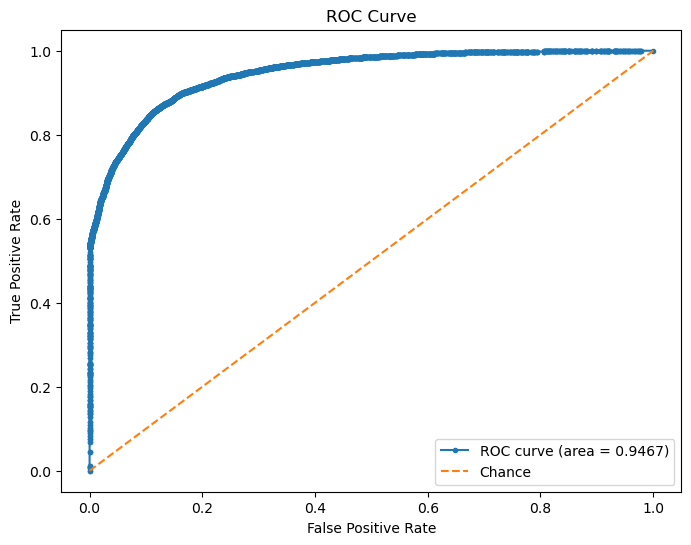

In [4]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Initialize lists for true labels and predicted scores
true_labels = []
predicted_scores = []

# Populate true_labels and predicted_scores based on the severity groups
for severity, subfolders in severity_groups.items():
    if severity == 'Borderline':
        continue  # Skip the 'Borderline' group
    for subfolder in subfolders:
        if subfolder in diameter_ratio_dict:
            ratios = diameter_ratio_dict[subfolder]
            true_labels.extend([0 if severity == 'Normal' else 1 for _ in ratios])
            predicted_scores.extend(ratios)

# Convert to numpy arrays for processing
true_labels = np.array(true_labels)
predicted_scores = np.array(predicted_scores)

# Calculate the AUC
auc = roc_auc_score(true_labels, predicted_scores)

print(f'AUC: {auc:.4f}')

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(true_labels, predicted_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [318]:
import numpy as np
# Find indices of "Mild" and "Severe" distributions
mild_index = sorted_grouped_subfolders.index('mild, slightly')
#mild_index = sorted_grouped_subfolders.index('normal')
severe_index = sorted_grouped_subfolders.index('normal')
#severe_index = sorted_grouped_subfolders.index('mild, slightly')

# Get ratios lists for "Mild" and "Severe" distributions
mild_ratios = sorted_grouped_ratios_lists[mild_index]
severe_ratios = sorted_grouped_ratios_lists[severe_index]
print(mild_ratios[1:5])
print(severe_ratios[1:5])
print(np.median(mild_ratios))
print(np.median(severe_ratios))

# Find the range of "Mild" distribution
#mild_min, mild_max = min(mild_ratios), max(mild_ratios)
mild_min, mild_max = np.percentile(mild_ratios, [1, 99])
print(mild_min, mild_max)


values_within_range = np.logical_and(severe_ratios >= mild_min, severe_ratios <= mild_max)
percentage_within_range = np.mean(values_within_range) * 100

print(f"The percentage of values within the range [{mild_min}, {mild_max}] is: {percentage_within_range:.2f}%")

[0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
[0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
0.5807086614173228
0.46893974778141057
0.46401348207580007 0.7034471179284483
The percentage of values within the range [0.46401348207580007, 0.7034471179284483] is: 53.34%


In [320]:
import numpy as np
# Find indices of "Mild" and "Severe" distributions
mild_index = sorted_grouped_subfolders.index('mild, slightly')
#mild_index = sorted_grouped_subfolders.index('normal')
severe_index = sorted_grouped_subfolders.index('normal')
#severe_index = sorted_grouped_subfolders.index('mild, slightly')

# Get ratios lists for "Mild" and "Severe" distributions
mild_ratios = sorted_grouped_ratios_lists[mild_index]
severe_ratios = sorted_grouped_ratios_lists[severe_index]
print(mild_ratios[1:5])
print(severe_ratios[1:5])
print(np.median(mild_ratios))
print(np.median(severe_ratios))

# Find the range of "Mild" distribution
#mild_min, mild_max = min(mild_ratios), max(mild_ratios)
mild_min, mild_max = np.percentile(mild_ratios, [25, 75])
print(mild_min, mild_max)


values_within_range = np.logical_and(severe_ratios >= mild_min, severe_ratios <= mild_max)
percentage_within_range = np.mean(values_within_range) * 100

print(f"The percentage of values within the range [{mild_min}, {mild_max}] is: {percentage_within_range:.2f}%")

[0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
[0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
0.5807086614173228
0.46893974778141057
0.5446250953735174 0.618800461361015
The percentage of values within the range [0.5446250953735174, 0.618800461361015] is: 9.12%


In [325]:
def percentage_above_threshold(lst, threshold):
    above_threshold = sum(1 for value in lst if value > threshold)
    total_values = len(lst)
    percentage = (above_threshold / total_values) * 100
    return percentage

# Example usage:
values = severe_ratios
print(values[0:5])
threshold = 0.57
percentage_above = percentage_above_threshold(values, threshold)
print(f"The percentage of values above {threshold} is: {percentage_above:.2f}%")


[0.49557522123893805, 0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
The percentage of values above 0.57 is: 3.23%


Interval 1: 42.56% of values
Interval 2: 26.42% of values
Interval 3: 10.43% of values
Interval 4: 7.46% of values
Interval 5: 5.49% of values
Interval 6: 4.06% of values
Interval 7: 3.58% of values


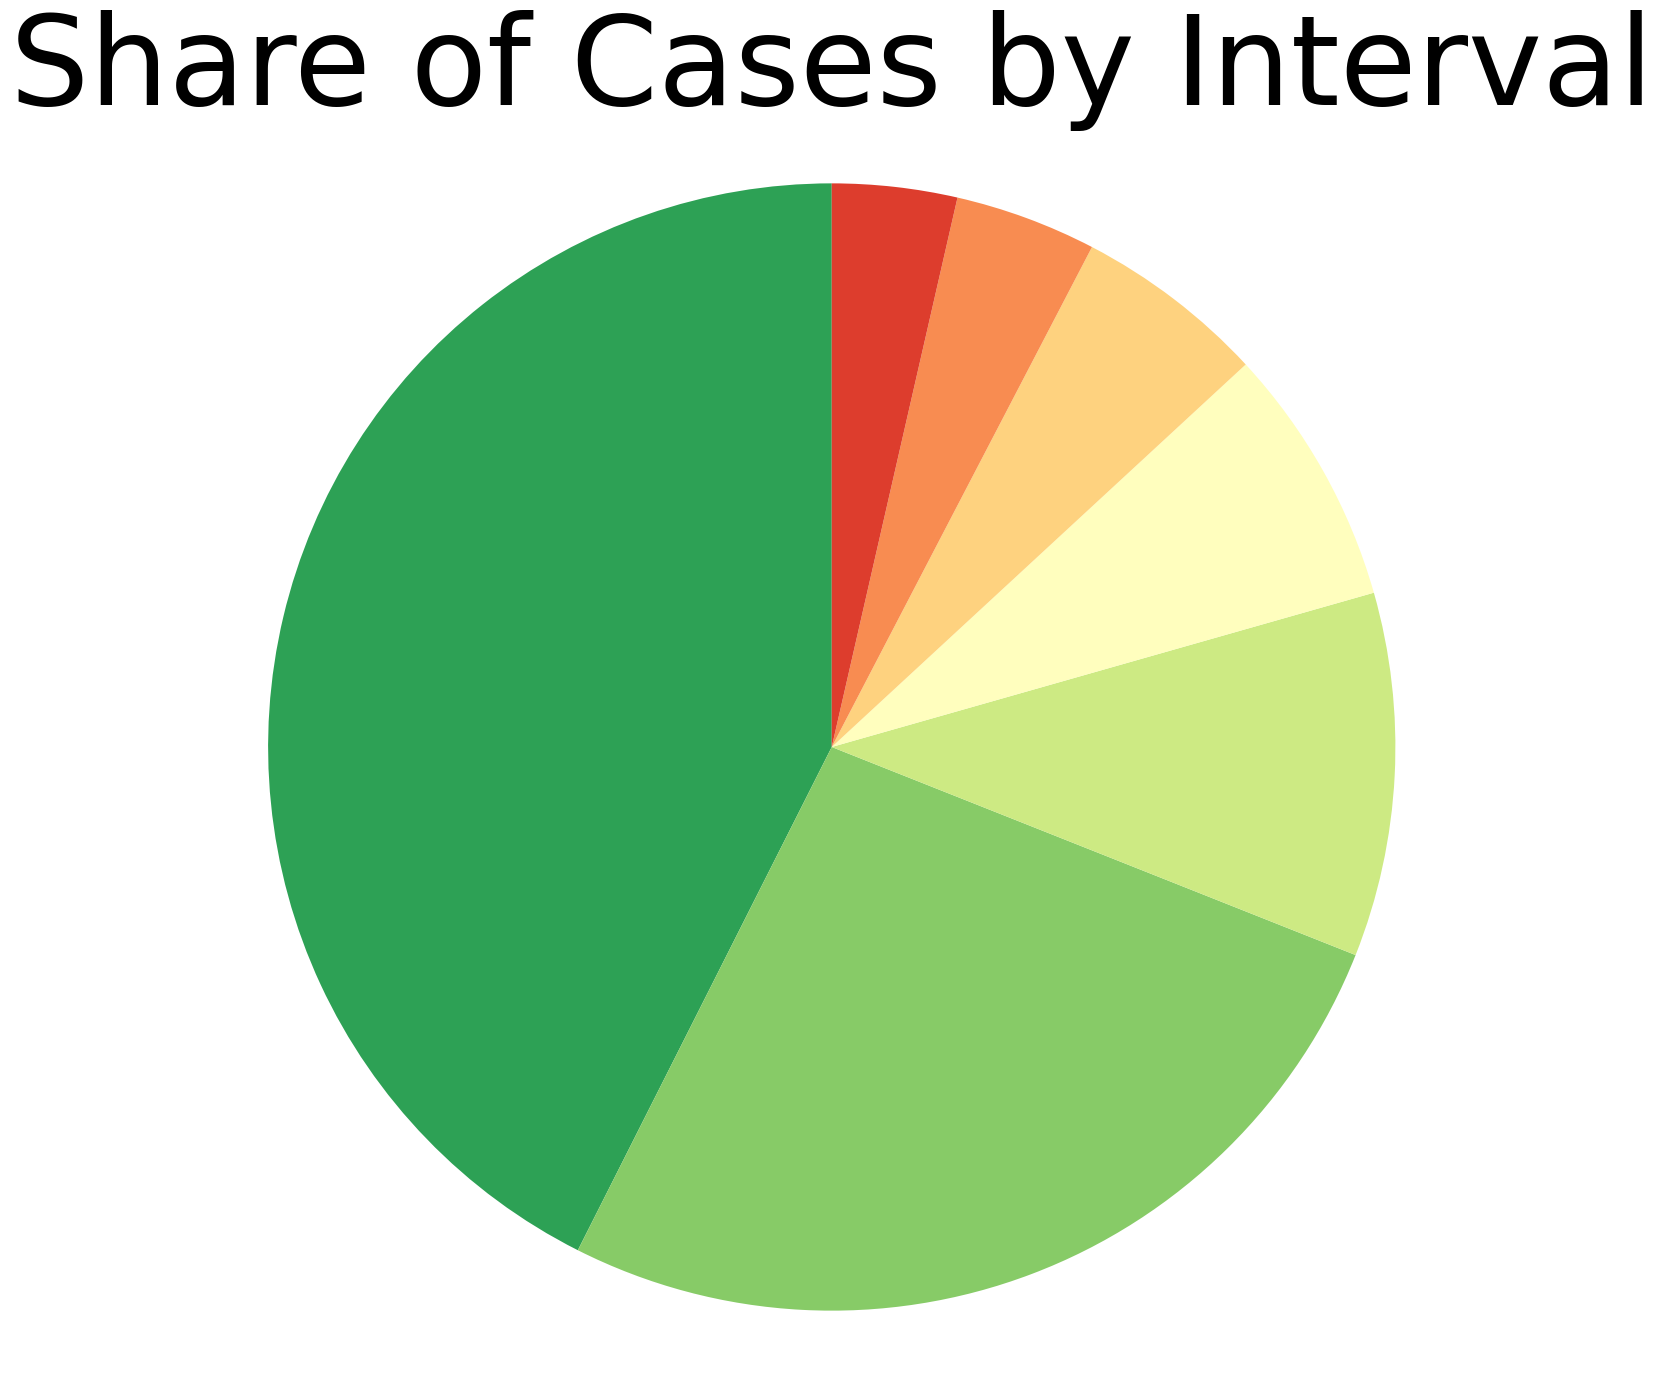

In [249]:
percentages = []  # Initialize an empty list to store percentages

total_values = sum(len(ratios_list) for ratios_list in sorted_grouped_ratios_lists)

for i, threshold in enumerate(thresholds):
    if threshold < 0.88:
        values_within_interval = sum(1 for ratios_list in sorted_grouped_ratios_lists for ratio in ratios_list if threshold <= ratio < thresholds[i+1])
        percentage_within_interval = (values_within_interval / total_values) * 100
        percentages.append(percentage_within_interval)  # Append the calculated percentage to the list
        print(f"Interval {i+1}: {percentage_within_interval:.2f}% of values")



        
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn_r", n_colors=len(percentages))

# Create the pie chart with specified fontsize for percentages
plt.figure(figsize=(16, 16))
plt.pie(percentages, labels=None, colors=custom_colors, startangle=90, textprops={'fontsize': 20})  # Set fontsize to 14
plt.title('Share of Cases by Interval', fontsize=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()


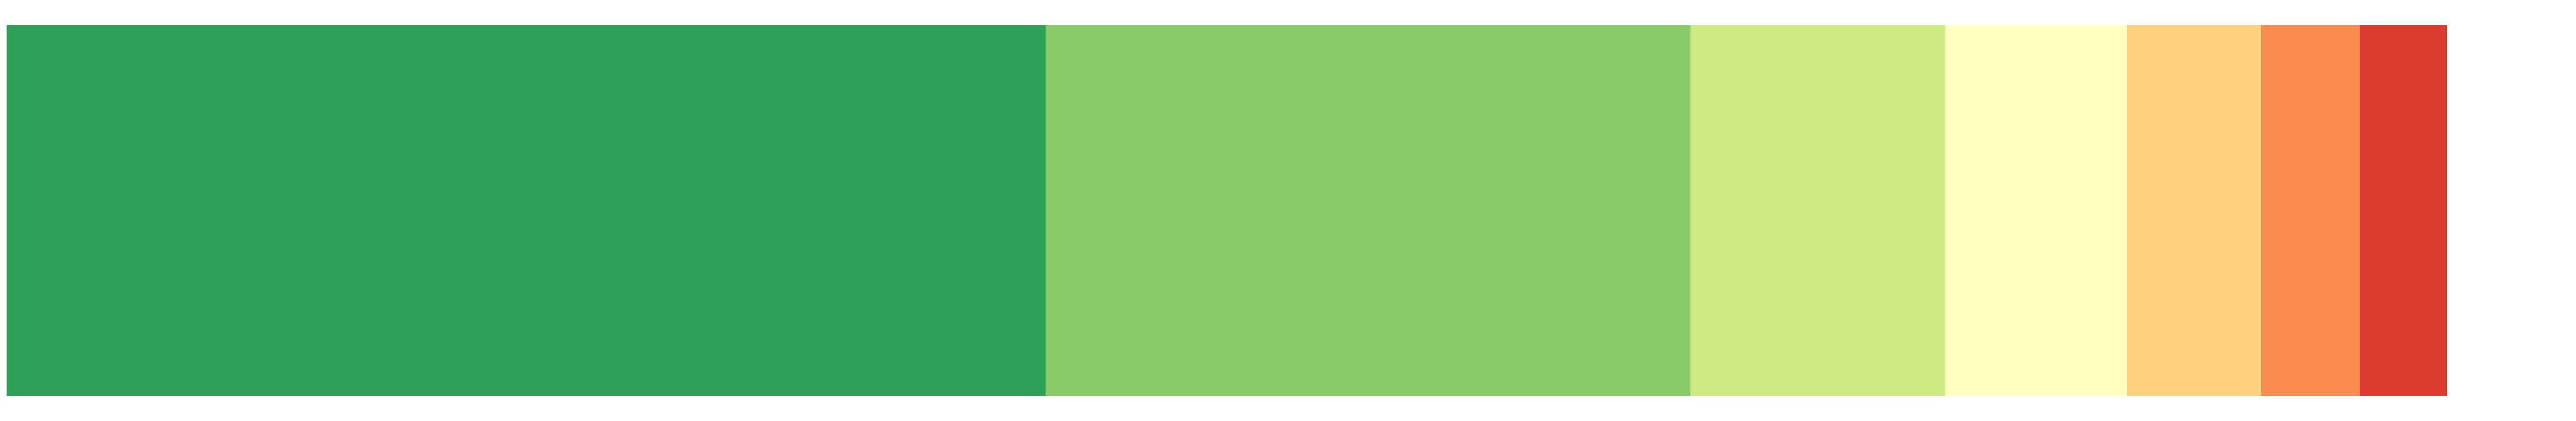

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn_r", n_colors=len(percentages))

# Create a horizontal stacked bar chart
plt.figure(figsize=(50, 8))  # Adjust the figure size as needed

# Plot the segmented bar
bar_width = 0.5  # Width of the bar
bar_bottom = 0  # Bottom position of the bar

for percentage, color in zip(percentages, custom_colors):
    plt.barh(0, percentage, color=color, height=bar_width, left=bar_bottom)
    bar_bottom += percentage  # Move to the right for the next segment

# Hide axis and border
plt.axis('off')

# Hide labels
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.show()


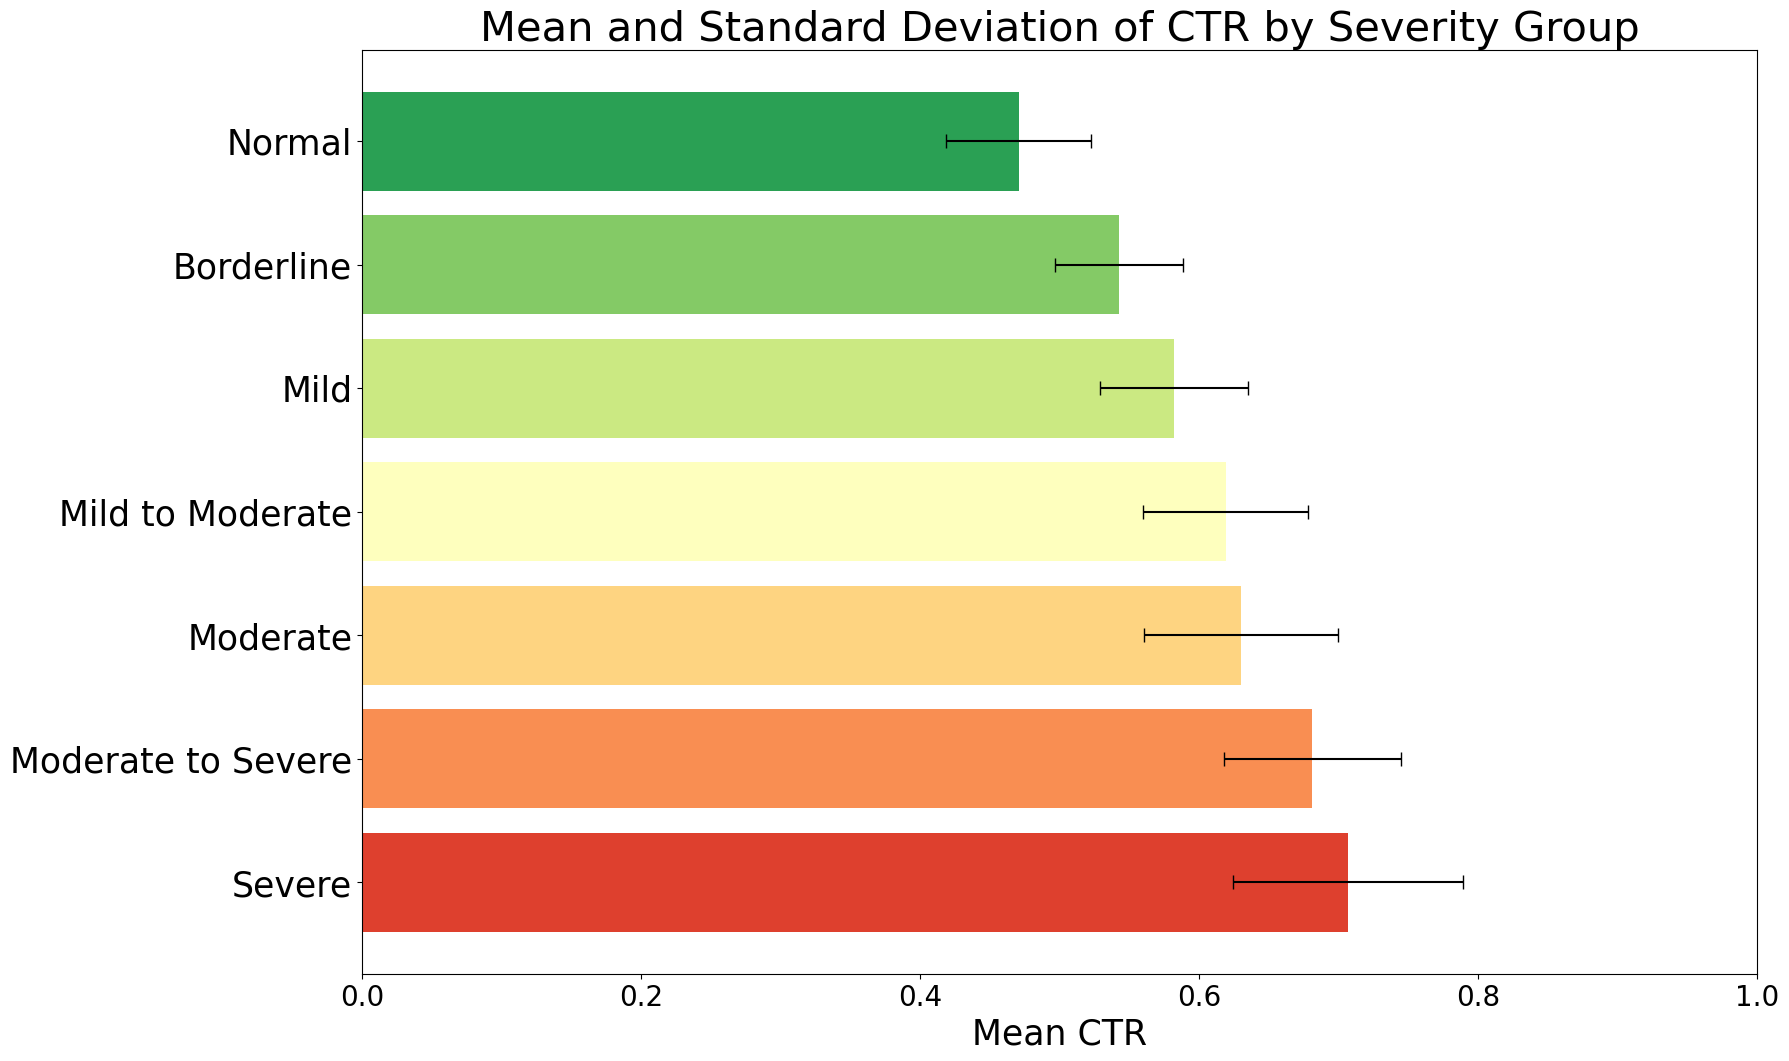

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate mean and standard deviation for each group
group_means = [np.mean(ratios_list) for ratios_list in sorted_grouped_ratios_lists]
group_stds = [np.std(ratios_list) for ratios_list in sorted_grouped_ratios_lists]

# Reverse the order of the data
group_means = group_means[::-1]
group_stds = group_stds[::-1]

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn", n_colors=len(group_means))

# Create bar chart with error bars
plt.figure(figsize=(18, 12))
plt.xlim(0, 1)
plt.barh(range(len(group_means)), group_means, xerr=group_stds, color=custom_colors, capsize=5)
plt.yticks(range(len(group_means)), reversed(list(severity_groups.keys())), fontsize=25)  
plt.xticks(fontsize=20)
plt.xlabel('Mean CTR', fontsize=25)
plt.title('Mean and Standard Deviation of CTR by Severity Group', fontsize=30)

# Show the plot
plt.show()


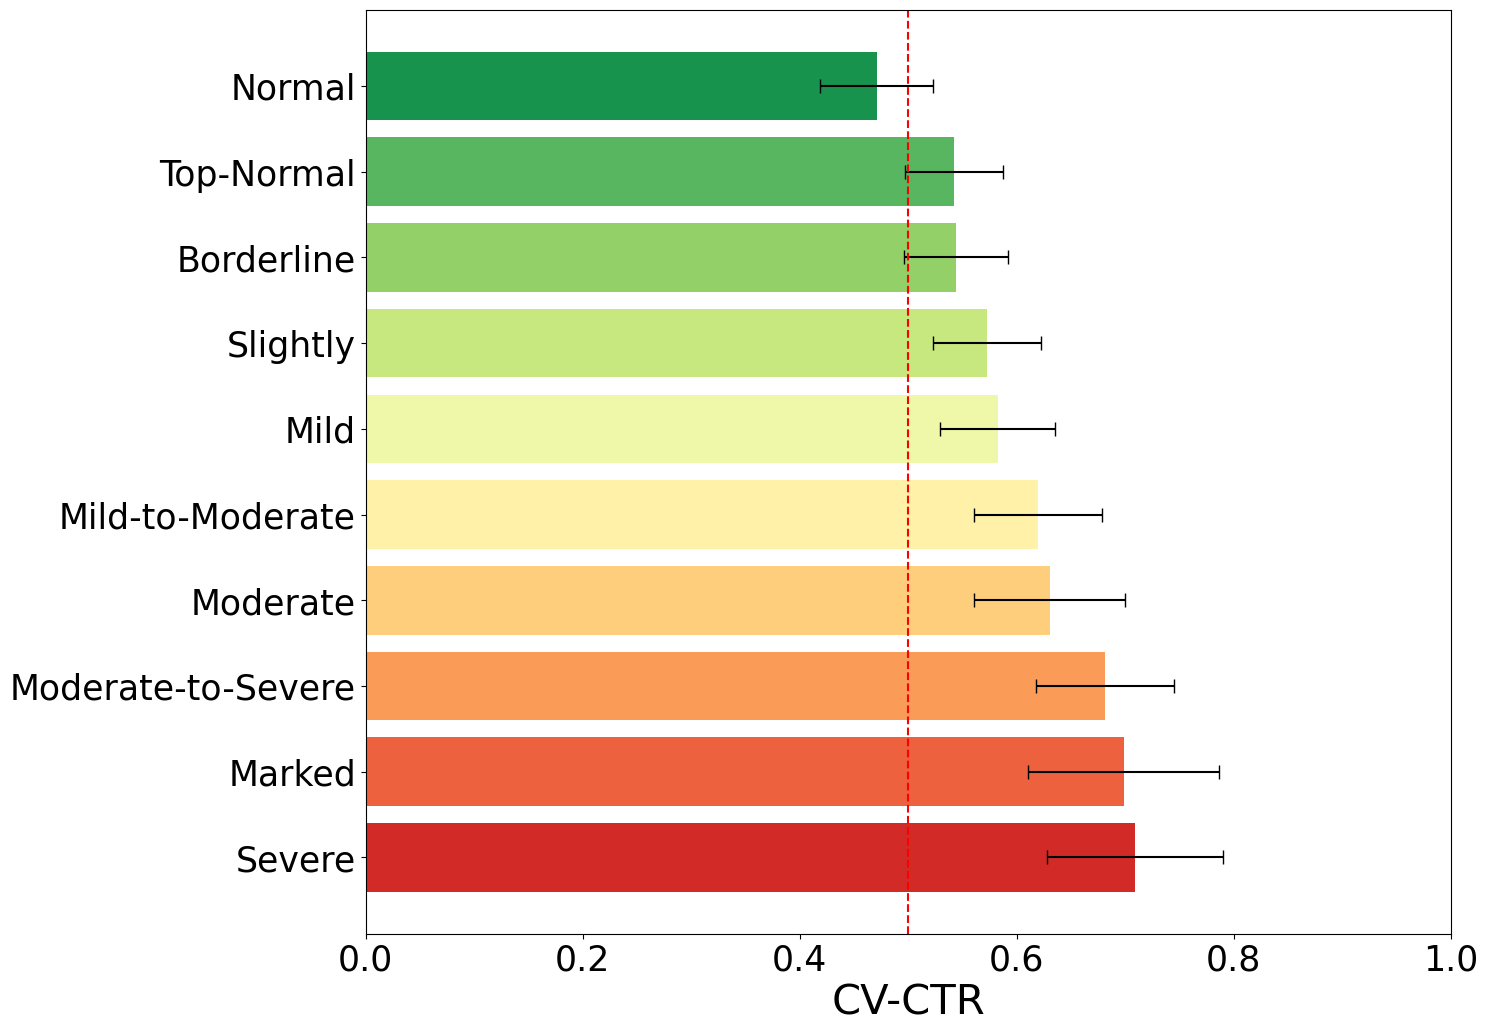

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure to have seaborn installed
import numpy as np

# Calculate mean and standard deviation for each group
group_means = [np.mean(ratios_list) for ratios_list in sorted_ratios_lists]
group_stds = [np.std(ratios_list) for ratios_list in sorted_ratios_lists]

# Reverse the order of means, standard deviations, and subfolders
group_means.reverse()
group_stds.reverse()

# Define custom colors using RdYlGn_r color scheme
custom_colors = sns.color_palette("RdYlGn", n_colors=len(group_means))
custom_labels = ["Normal", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"][::-1]

# Create bar chart with error bars
plt.figure(figsize=(14, 12))
plt.barh(range(len(group_means)), group_means, xerr=group_stds, color=custom_colors, capsize=5)
plt.yticks(range(len(sorted_subfolders)), custom_labels, fontsize=25)
plt.xlabel('Mean Diameter Ratio', fontsize=14)
plt.xlim(0, 1)
plt.xticks(fontsize=25)
plt.xlabel('CV-CTR', fontsize=30)
#plt.title('Mean and Standard Deviation of CTR by Severity Group', fontsize=30)
plt.axvline(x=0.5, color='red', linestyle='--')

plt.savefig(r'C:\Users\Tianh\Downloads\CTR bars.svg', format='svg', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


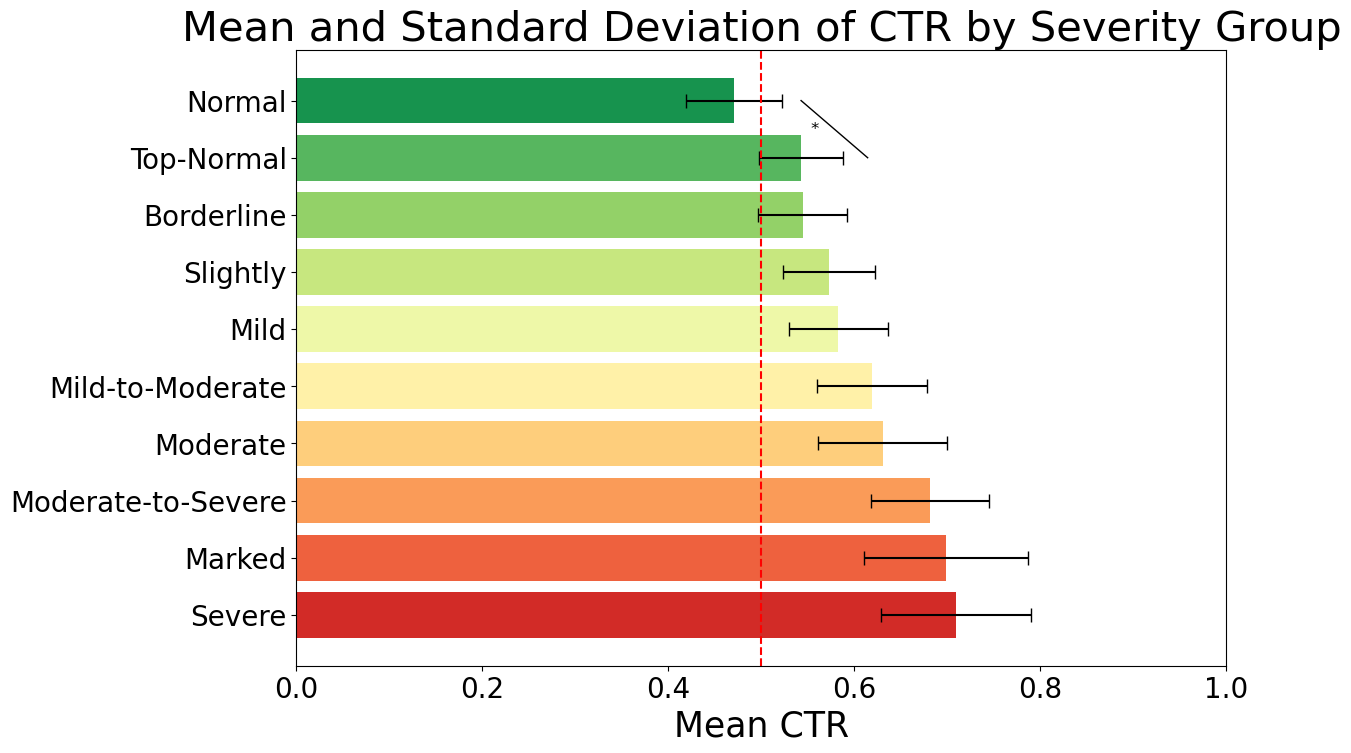

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define pre-calculated t-test p-values between pairs of bars
p_values = [["Normal", "Top-Normal", 0.01]]

# Calculate mean and standard deviation for each group
group_means = [np.mean(ratios_list) for ratios_list in sorted_ratios_lists]
group_stds = [np.std(ratios_list) for ratios_list in sorted_ratios_lists]

# Reverse the order of means, standard deviations, and subfolders
group_means.reverse()
group_stds.reverse()

# Define custom colors using RdYlGn_r color scheme
custom_colors = sns.color_palette("RdYlGn", n_colors=len(group_means))
custom_labels = ["Normal", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"][::-1]

# Create bar chart with error bars
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(group_means)), group_means, xerr=group_stds, color=custom_colors, capsize=5)

# Annotate significance based on t-test p-values
significance_level = 0.05  # Set the significance level
for p_value_data in p_values:
    label1, label2, p_value = p_value_data
    if p_value < significance_level:
        index1 = custom_labels.index(label1)
        index2 = custom_labels.index(label2)
        
        # Find the longer bar's max SD
        max_sd = max(group_stds[index1], group_stds[index2])
        
        # Draw a vertical line covering both bars on the right
        plt.plot([group_means[index1] + max_sd + 0.02, group_means[index2] + max_sd + 0.02], [index1, index2], color='black', linestyle='-', linewidth=1)
        
        # Calculate the position for annotating asterisks
        x_pos = group_means[index1] + max_sd + 0.03
        y_pos = (index1 + index2) / 2  # Position between the two bars
        
        # Annotate significance with asterisks
        plt.text(x_pos, y_pos, "*", fontsize=12, verticalalignment='center', horizontalalignment='left')  # Correct the horizontal alignment

plt.yticks(range(len(sorted_subfolders)), custom_labels, fontsize=20)
plt.xlabel('Mean Diameter Ratio', fontsize=14)
plt.title('Mean and Standard Deviation of Diameter Ratio by Severity Group', fontsize=16)
plt.xlim(0, 1)
plt.xticks(fontsize=20)
plt.xlabel('Mean CTR', fontsize=25)
plt.title('Mean and Standard Deviation of CTR by Severity Group', fontsize=30)
plt.axvline(x=0.5, color='red', linestyle='--')

# Show the plot
plt.show()

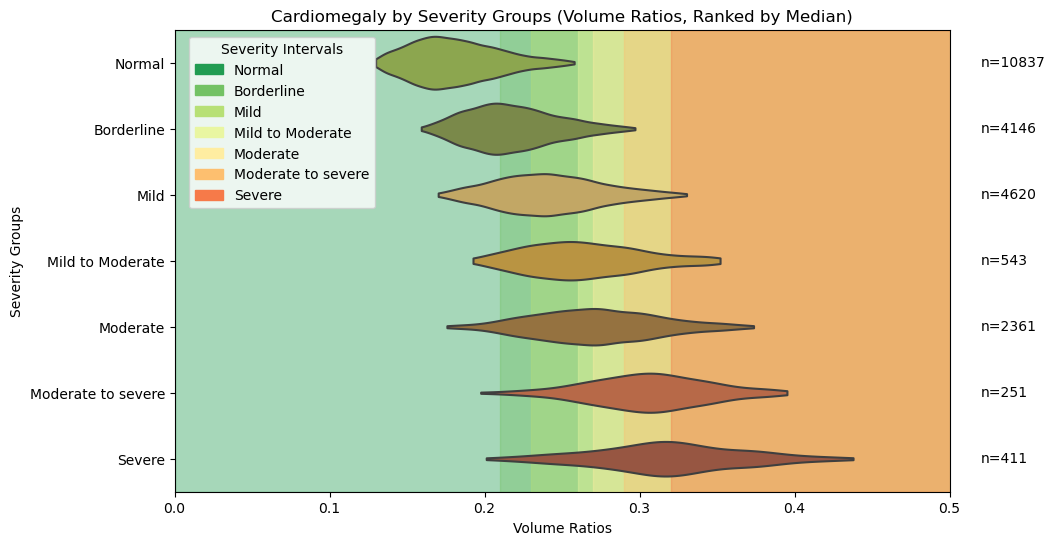

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Assuming volume_ratio_dict is already populated with the required data

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding volume ratios
subfolders = list(volume_ratio_dict.keys())
ratios_lists = list(volume_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Function to filter each list by removing the top and bottom 2.5% of values by percentile
def filter_by_percentile(ratios_list):
    lower_bound, upper_bound = np.percentile(ratios_list, [2.5, 97.5])
    return [ratio for ratio in ratios_list if lower_bound <= ratio <= upper_bound]

# Apply filtering to each list
filtered_ratios_lists = [filter_by_percentile(ratios_list) for ratios_list in filtered_ratios_lists]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors
custom_colors = ["#a54f34", "#ca6235", "#a37532", "#cd9c2e", "#d1ad56", "#80933f", "#92b540"][::-1]

# Create a colormap from the custom colors
cmap = sns.color_palette(custom_colors)

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot
ax.set_title('Cardiomegaly by Severity Groups (Volume Ratios, Ranked by Median)')
ax.set_xlabel('Volume Ratios')
ax.set_ylabel('Severity Groups')

# Set y-ticks and labels
ax.set_yticks(range(len(sorted_grouped_subfolders)))
ax.set_yticklabels(severity_groups.keys())

ax.grid(False)
ax.set_xlim(0, 0.5)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(0.52, i, f'n={len(ratios_list)}', va='center', ha='left')

# Shade the x-value intervals based on thresholds with "RdYlGn" color gradient
thresholds = [0, 0.21, 0.23, 0.26, 0.27, 0.29, 0.32]
colors = sns.color_palette("RdYlGn", n_colors=len(thresholds) + 1)[::-1]

for i, threshold in enumerate(thresholds):
    ax.axvspan(threshold, 1, color=colors[i], alpha=0.4, zorder=-1)
    
# Add legend with color blocks and severity group names
legend_elements = [Patch(color=colors[i], label=group) for i, group in enumerate(severity_groups.keys())]

ax.legend(handles=legend_elements, title="Severity Intervals", bbox_to_anchor=(0.01, 1), loc='upper left')

# Show the plot
plt.show()


In [140]:
import numpy as np
from scipy.stats import ttest_ind

def calculate_thresholds(ratios_lists):
    thresholds = []
    previous_group = None

    # Iterate through values between 0.42 and 1 at intervals of 0.01
    for value in np.arange(0.1, 0.5, 0.01):
        max_p_value = 0
        max_p_group = None

        # Iterate through sublists and perform t-test for each value
        for i, sublist in enumerate(ratios_lists):
            _, p_value = ttest_ind(sublist, [value])

            # Update max_p_value and max_p_group
            if p_value > max_p_value:
                max_p_value = p_value
                max_p_group = i

        # Record threshold when the highest p value belongs to a different group
        if max_p_group != previous_group:
            # Round the threshold to 0.01
            rounded_threshold = round(value, 2)
            thresholds.append(rounded_threshold)
            previous_group = max_p_group

    return thresholds

# Apply the updated function to sorted_grouped_ratios_lists
new_thresholds = calculate_thresholds(sorted_grouped_ratios_lists)

# Display the new thresholds
print("Volume Thresholds:", new_thresholds)


Volume Thresholds: [0.1, 0.21, 0.23, 0.26, 0.27, 0.29, 0.32]


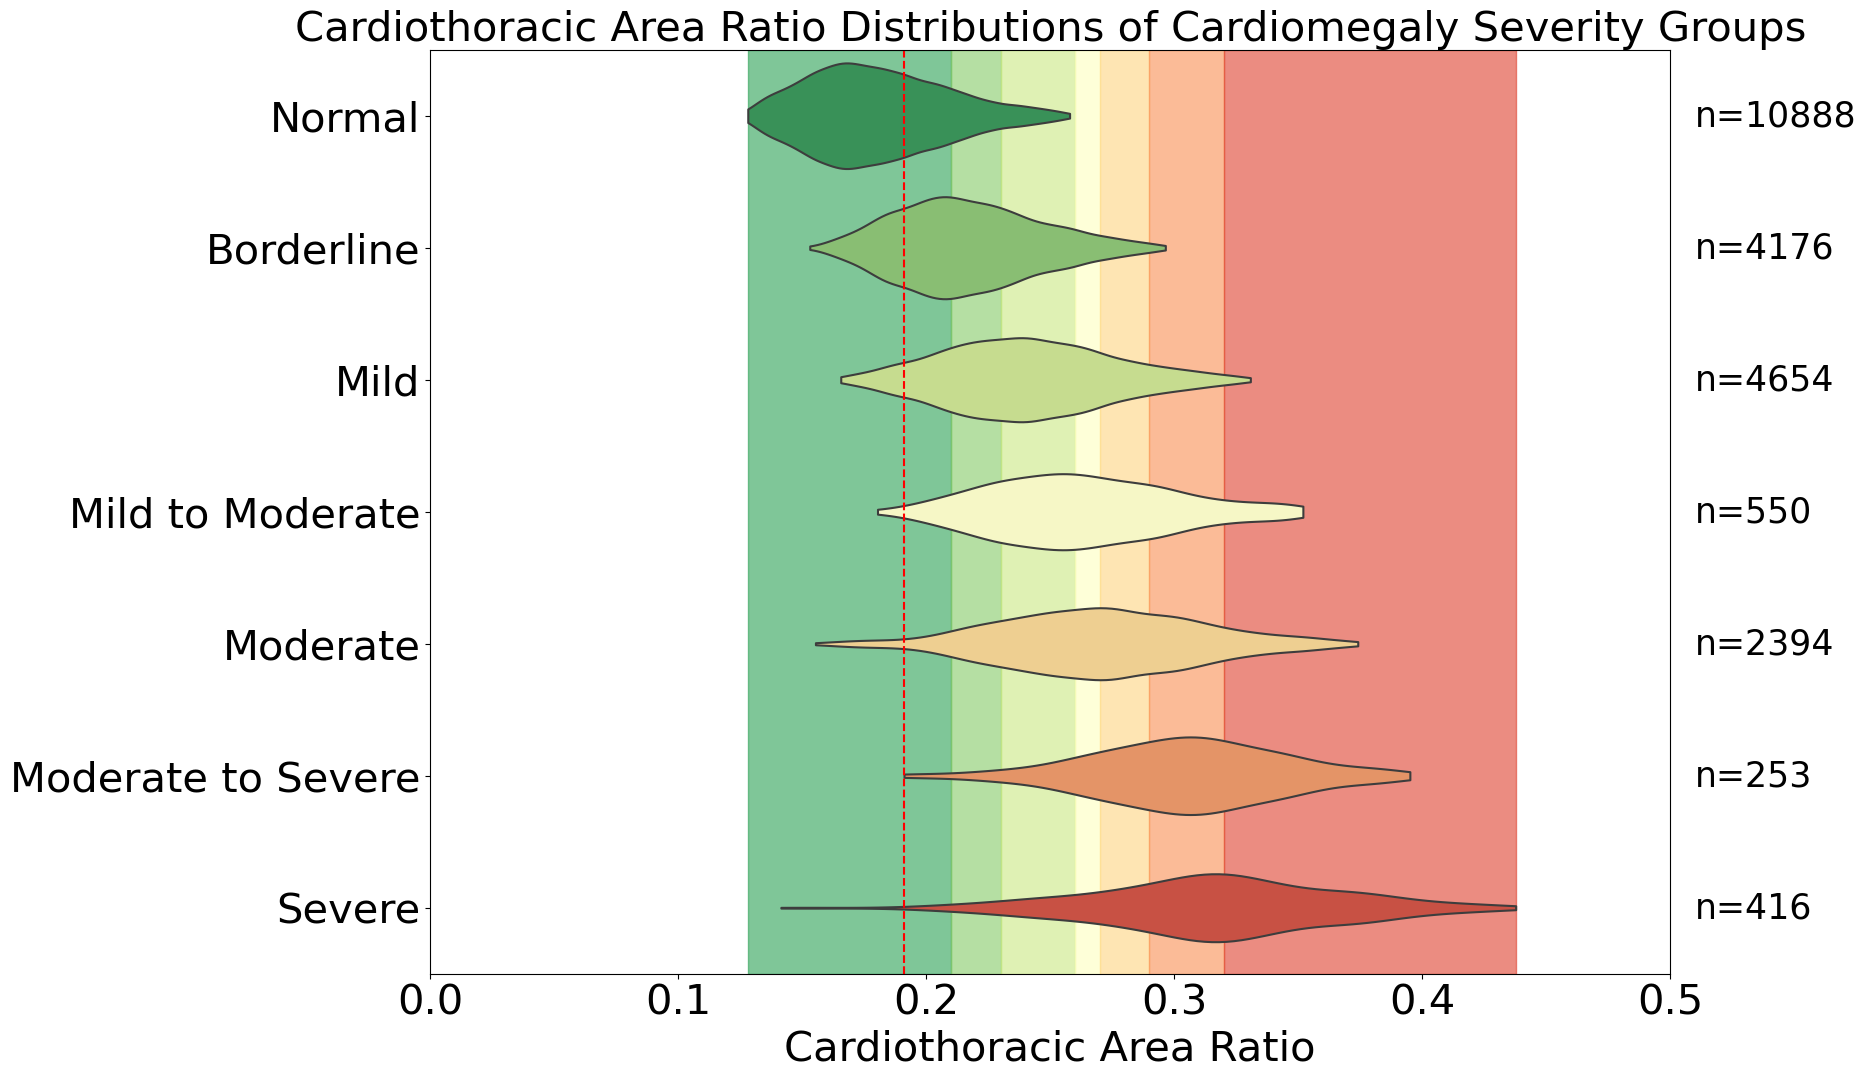

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Group subfolders based on severity descriptor
severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to Severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}

# Extract subfolders and corresponding diameter ratios
subfolders = list(volume_ratio_dict.keys())
ratios_lists = list(volume_ratio_dict.values())

# Filter lists with n > 50
filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]

# Group subfolders and ratios based on severity descriptor
grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())

# Reverse the sorting order based on the median of the ratios in each severity group
sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]

# Define custom colors for the colormap transitioning from green to red
n_colors = len(sorted_grouped_subfolders)
custom_colors = sns.color_palette("RdYlGn", n_colors)

# Create a colormap transitioning from green to red
cmap = sns.color_palette(custom_colors[::-1])

# Create a horizontal violin plot with custom colors
fig, ax = plt.subplots(figsize=(16, 12))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)

# Customize the plot (remaining code remains unchanged)
ax.set_title('Cardiothoracic Area Ratio Distributions of Cardiomegaly Severity Groups', fontsize=30)
ax.set_xlabel('Cardiothoracic Area Ratio', fontsize=30)
ax.set_yticklabels(list(list(severity_groups.keys())), fontsize=30)  # Reverse order of severity legend names
ax.grid(False)
ax.axvline(x=0.191, color='red', linestyle='--')

# Set x-axis range from 0 to 1
ax.tick_params(axis='x', labelsize=30) 
ax.set_xlim(0, 0.5)

# Annotate the number of ratios for each violin
for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(0.51, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=25)

# Shade the x-value intervals based on thresholds with custom colormap
thresholds = [0.128, 0.21, 0.23, 0.26, 0.27, 0.29, 0.32, 0.438]  # Updated thresholds
colors = sns.color_palette(custom_colors[::-1])

for i, threshold in enumerate(thresholds):
    if threshold < 0.438:
        ax.axvspan(threshold, thresholds[i+1], color=colors[i], alpha=0.6, zorder=-1)


# Show the plot
plt.show()


Interval 1: 51.62% of values
Interval 2: 14.72% of values
Interval 3: 16.58% of values
Interval 4: 3.74% of values
Interval 5: 5.46% of values
Interval 6: 5.03% of values
Interval 7: 2.85% of values


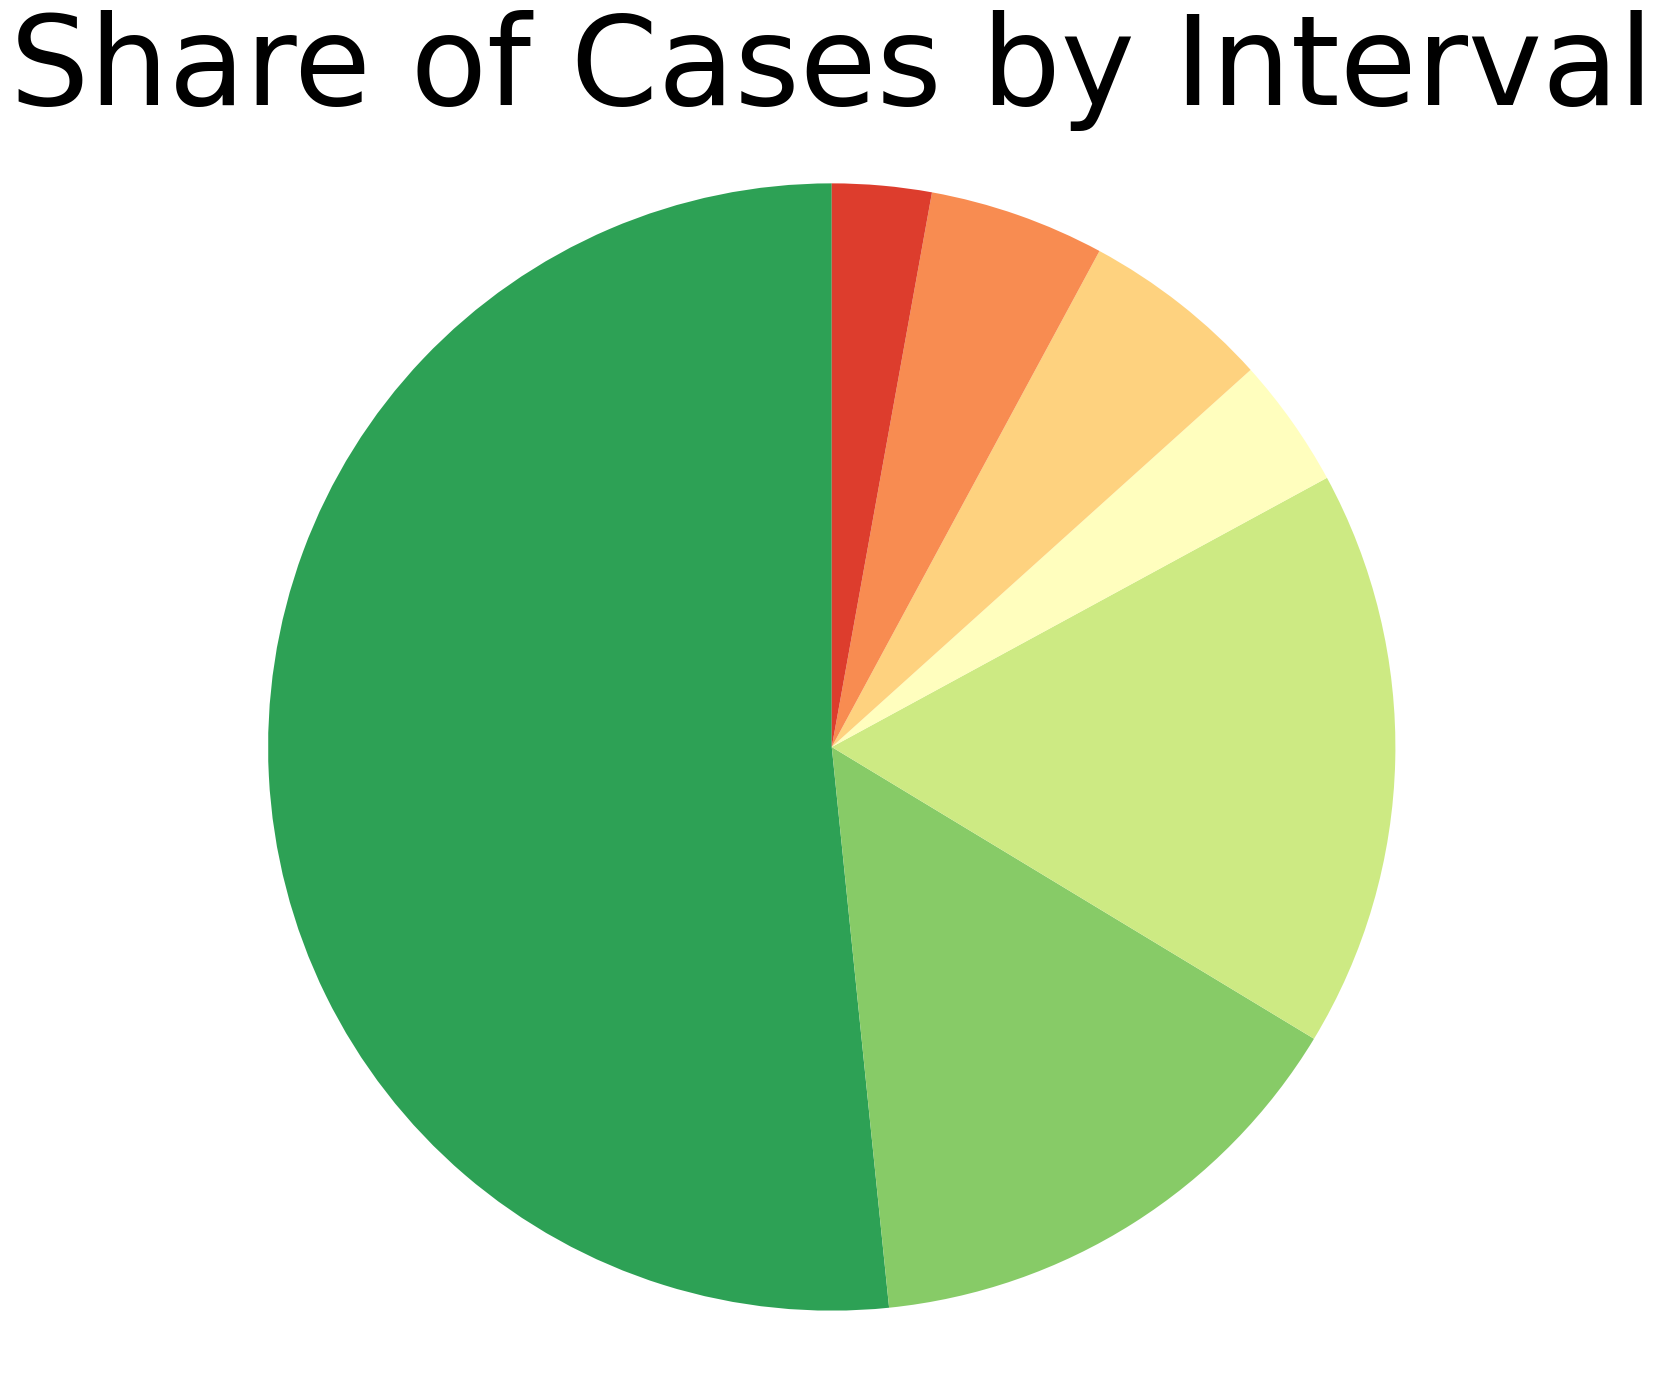

In [233]:
percentages = []  # Initialize an empty list to store percentages

total_values = sum(len(ratios_list) for ratios_list in sorted_grouped_ratios_lists)

for i, threshold in enumerate(thresholds):
    if threshold < 0.438:
        values_within_interval = sum(1 for ratios_list in sorted_grouped_ratios_lists for ratio in ratios_list if threshold <= ratio < thresholds[i+1])
        percentage_within_interval = (values_within_interval / total_values) * 100
        percentages.append(percentage_within_interval)  # Append the calculated percentage to the list
        print(f"Interval {i+1}: {percentage_within_interval:.2f}% of values")



        
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn_r", n_colors=len(percentages))

# Create the pie chart with specified fontsize for percentages
plt.figure(figsize=(16, 16))
plt.pie(percentages, labels=None, colors=custom_colors, startangle=90, textprops={'fontsize': 20})  # Set fontsize to 14
plt.title('Share of Cases by Interval', fontsize=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()


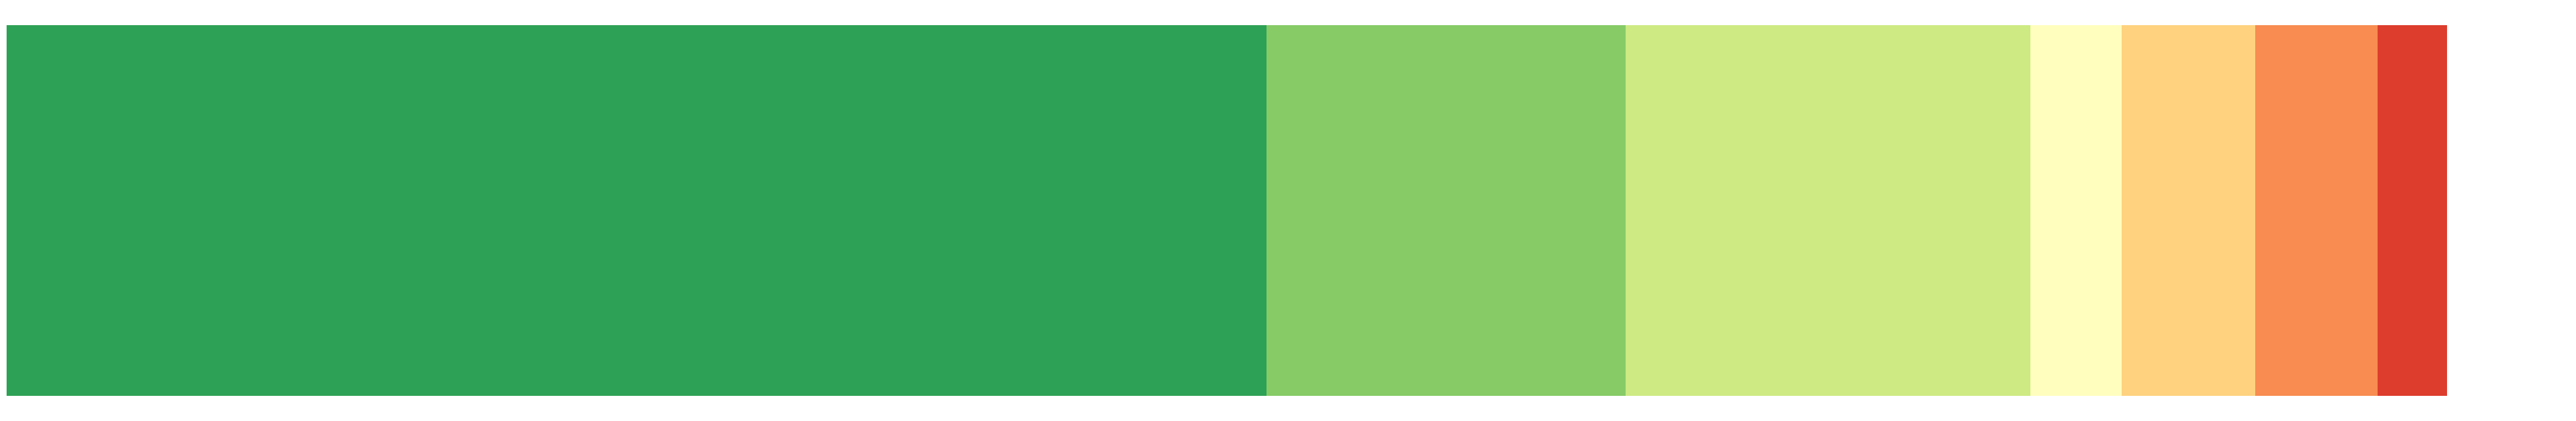

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn_r", n_colors=len(percentages))

# Create a horizontal stacked bar chart
plt.figure(figsize=(50, 8))  # Adjust the figure size as needed

# Plot the segmented bar
bar_width = 0.5  # Width of the bar
bar_bottom = 0  # Bottom position of the bar

for percentage, color in zip(percentages, custom_colors):
    plt.barh(0, percentage, color=color, height=bar_width, left=bar_bottom)
    bar_bottom += percentage  # Move to the right for the next segment

# Hide axis and border
plt.axis('off')

# Hide labels
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.show()


In [251]:
print(percentages)

[42.56304683479156, 26.419626007891576, 10.430605592726025, 7.458397666838222, 5.489792417224224, 4.057299708354778, 3.5812317721736147]


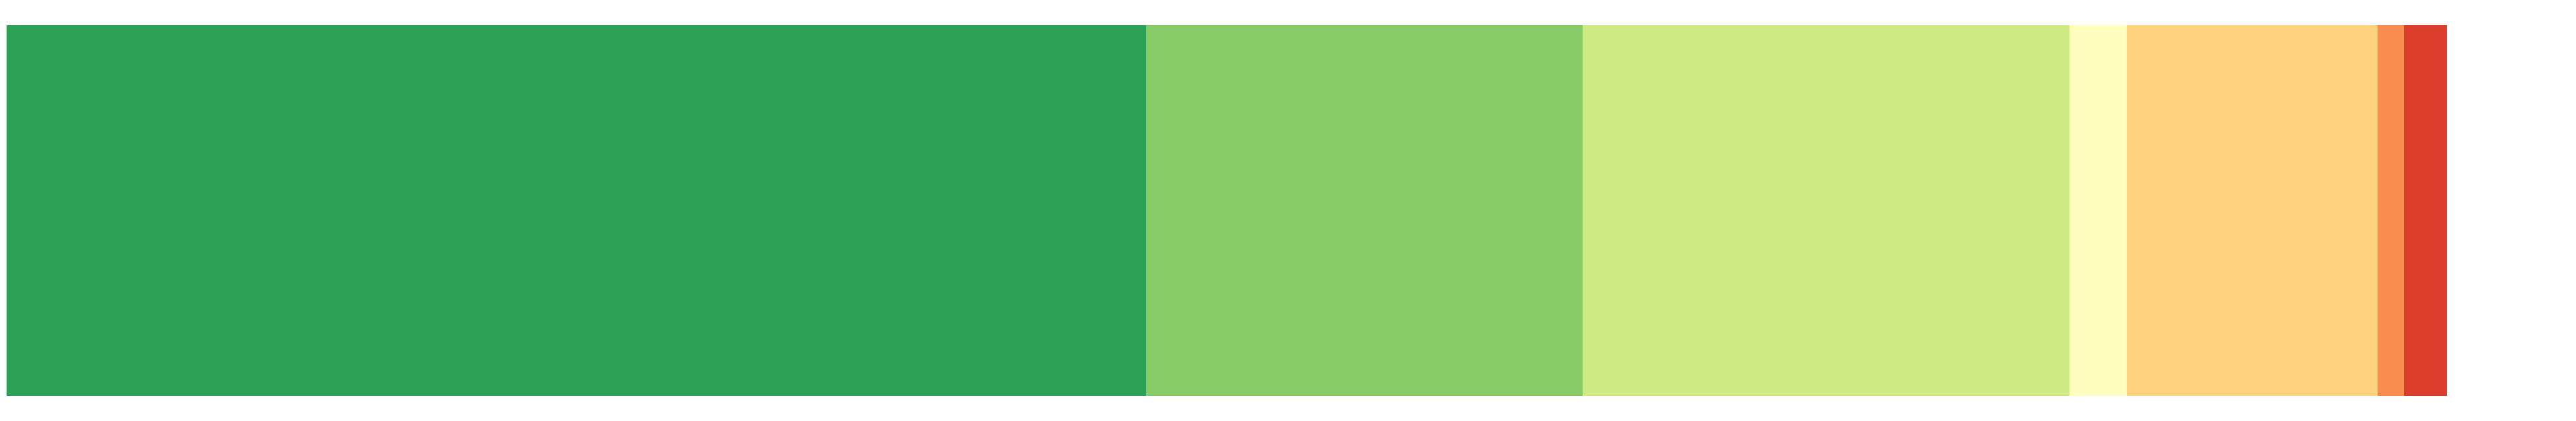

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

percentages = [1088300/23316, 417200/23316, 465100/23316, 55000/23316, 239200/23316, 25300/23316, 41500/23316]

# Define custom colors using RdYlGn color scheme
custom_colors = sns.color_palette("RdYlGn_r", n_colors=len(percentages))

# Create a horizontal stacked bar chart
plt.figure(figsize=(50, 8))  # Adjust the figure size as needed

# Plot the segmented bar
bar_width = 0.5  # Width of the bar
bar_bottom = 0  # Bottom position of the bar

for percentage, color in zip(percentages, custom_colors):
    plt.barh(0, percentage, color=color, height=bar_width, left=bar_bottom)
    bar_bottom += percentage  # Move to the right for the next segment

# Hide axis and border
plt.axis('off')

# Hide labels
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.show()
